# Modélisation : les émissions de CO2

In [1]:
# builtin
import os

# Time
import datetime
import time

#data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# configuration
from sklearn import set_config
set_config(display="diagram")
sns.set(style='whitegrid', palette='muted', color_codes=True)
pd.set_option('display.max_columns', 200)

# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import SCORERS
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# compose
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

# model_selection
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, train_test_split, StratifiedKFold

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# models
from sklearn.dummy import DummyRegressor


# other optimisation
import scipy as sp
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV, LinearRegression

from sklearn.model_selection import cross_validate, KFold

from sklearn.model_selection import cross_val_score


from sklearn.linear_model import ElasticNet

from sklearn.kernel_ridge import KernelRidge

from sklearn.neighbors import KNeighborsRegressor


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  LinearSVR

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import BaggingRegressor

from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

from sklearn.metrics import (roc_auc_score, r2_score, mean_squared_error )

print('OK!! ')

OK!! 


In [2]:
import xgboost as xgb

In [28]:
traget = 'TotalGHGEmissions'

In [4]:
path = "./data/transformed/"
filename = "X_train_tr.csv"
X_train_tr = pd.read_csv(path+filename, index_col ='Unnamed: 0')

In [5]:
path = "./data/transformed/"
filename = "X_test_tr.csv"
X_test_tr = pd.read_csv(path+filename, index_col ='Unnamed: 0')

In [6]:
path = "./data/transformed/"
filename = "y_train_tr.csv"
y_train = pd.read_csv(path+filename, index_col ='Unnamed: 0')
y_train = y_train[traget]

In [7]:
path = "./data/transformed/"
filename = "y_test_tr.csv"
y_test = pd.read_csv(path+filename, index_col ='Unnamed: 0')
y_test = y_test[traget]

In [33]:
path = "./data/transformed/"
filename = "y_log_targets.csv"
y_log_targets = pd.read_csv(path+filename, index_col ='Unnamed: 0')
y_log = y_log_targets['TotalGHGEmissions_log']

In [34]:
modelisation_columns = ['PropertyGFATotal', 'PropertyGFAParking', 'GFA_par_Building',
       'GFA_par_Floor', 'GFABuilding_s', 'PrimaryPropertyType_T_Encoded',
       'NumBuildings', 'NmbFloors', 'LargestUseType_GFA_proportion',
       'SecondUseType_GFA_proportion', 'ThirdUseType_GFA_proportion',
       'Ratio_Parking', 'Ratio_Building', 'Nombre_Usage_Type',
       'proportion_Electricity', 'proportion_Steam', 'proportion_NaturalGas',
       'Neighborhood_H_DOWNTOWN', 'Neighborhood_H_NORTHEAST',
       'Neighborhood_H_EAST', 'Neighborhood_H_LAKE UNION',
       'Neighborhood_H_GREATER DUWAMISH',
       'Neighborhood_H_MAGNOLIA / QUEEN ANNE', 'Neighborhood_H_BALLARD',
       'Neighborhood_H_NORTHWEST', 'Neighborhood_H_CENTRAL',
       'Neighborhood_H_SOUTHEAST', 'Neighborhood_H_DELRIDGE',
       'Neighborhood_H_NORTH', 'Neighborhood_H_SOUTHWEST',
       'BuildingType_H_NonResidential', 'BuildingType_H_Nonresidential COS',
       'BuildingType_H_Campus', 'BuildingType_H_SPS-District K-12',
       'Age_Building_groupe_L']

Star_Score = ['ENERGYSTARScore']

# X_train, X_test

In [49]:
X_train = X_train_tr[modelisation_columns]
X_test = X_test_tr[modelisation_columns]

In [50]:
y_train_log = y_log[(list(X_train.index))]
y_test_log = y_log[(list(X_test.index))]

In [51]:
X_train.head()

PropertyGFATotal  PropertyGFAParking  GFA_par_Building  GFA_par_Floor  \
1080         -0.541261           -0.325126         -0.528623      -0.223072   
44            0.486084           -0.325126          0.513163       0.520886   
1100         -0.371315           -0.325126         -0.356288       0.301052   
1193         -0.538955           -0.325126         -0.526285      -0.453646   
571          -0.534344           -0.325126         -0.602099      -0.446536   

      GFABuilding_s  PrimaryPropertyType_T_Encoded  NumBuildings  NmbFloors  \
1080      -0.531814                      -0.496985           1.0        1.0   
44         0.680340                       0.492855           1.0        3.0   
1100      -0.331296                      -0.794621           1.0        1.0   
1193      -0.529093                      -0.496985           1.0        2.0   
571       -0.523653                       0.389028           2.0        2.0   

      LargestUseType_GFA_proportion  SecondUseType_GFA_proportion  \
1080                          100.0                           0.0   
44                            100.0                           0.0   
1100                          100.0                           0.0   
1193                          100.0                           0.0   
571                           100.0                           0.0   

      ThirdUseType_GFA_proportion  Ratio_Parking  Ratio_Building  \
1080                          0.0            0.0           100.0   
44                            0.0            0.0           100.0   
1100                          0.0            0.0           100.0   
1193                          0.0            0.0           100.0   
571                           0.0            0.0           100.0   

      Nombre_Usage_Type  proportion_Electricity  proportion_Steam  \
1080                1.0                   100.0               0.0   
44                  1.0                    59.0               0.0   
1100                3.0                    23.0              77.0   
1193                3.0                   100.0               0.0   
571                 1.0                    52.0               0.0   

      proportion_NaturalGas  Neighborhood_H_DOWNTOWN  \
1080                    0.0                      0.0   
44                     41.0                      0.0   
1100                    1.0                      0.0   
1193                    0.0                      0.0   
571                    48.0                      0.0   

      Neighborhood_H_NORTHEAST  Neighborhood_H_EAST  \
1080                       0.0                  0.0   
44                         0.0                  1.0   
1100                       0.0                  1.0   
1193                       0.0                  0.0   
571                        1.0                  0.0   

      Neighborhood_H_LAKE UNION  Neighborhood_H_GREATER DUWAMISH  \
1080                        1.0                              0.0   
44                          0.0                              0.0   
1100                        0.0                              0.0   
1193                        0.0                              1.0   
571                         0.0                              0.0   

      Neighborhood_H_MAGNOLIA / QUEEN ANNE  Neighborhood_H_BALLARD  \
1080                                   0.0                     0.0   
44                                     0.0                     0.0   
1100                                   0.0                     0.0   
1193                                   0.0                     0.0   
571                                    0.0                     0.0   

      Neighborhood_H_NORTHWEST  Neighborhood_H_CENTRAL  \
1080                       0.0                     0.0   
44                         0.0                     0.0   
1100                       0.0                     0.0   
1193                       0.0                     0.0   
571                        0.

In [52]:
y_train.head()

1080      3.25
44      430.84
1100     65.05
1193      3.06
571      46.57
Name: TotalGHGEmissions, dtype: float64

In [53]:
y_train_log.head()

1080    1.700440
44      8.751008
1100    6.023477
1193    1.613532
571     5.541329
Name: TotalGHGEmissions_log, dtype: float64

In [54]:
X_test.head()

PropertyGFATotal  PropertyGFAParking  GFA_par_Building  GFA_par_Floor  \
583          -0.557801           -0.325126         -0.545395      -0.587018   
198          -0.274551           -0.325126         -0.258163      -0.368628   
828          -0.313388           -0.325126         -0.297547      -0.105815   
1146         -0.511948           -0.325126         -0.498898      -0.412000   
390          -0.157327           -0.325126         -0.501490       0.134836   

      GFABuilding_s  PrimaryPropertyType_T_Encoded  NumBuildings  NmbFloors  \
583       -0.551329                      -0.060662           1.0        4.0   
198       -0.217125                      -0.680915           1.0        4.0   
828       -0.262949                      -0.060662           1.0        2.0   
1146      -0.497228                      -0.794621           1.0        2.0   
390       -0.078814                      -0.164361           3.0        2.0   

      LargestUseType_GFA_proportion  SecondUseType_GFA_proportion  \
583                           100.0                           0.0   
198                           100.0                           0.0   
828                           100.0                           0.0   
1146                          100.0                           0.0   
390                           100.0                           0.0   

      ThirdUseType_GFA_proportion  Ratio_Parking  Ratio_Building  \
583                           0.0            0.0           100.0   
198                           0.0            0.0           100.0   
828                           0.0            0.0           100.0   
1146                          0.0            0.0           100.0   
390                           0.0            0.0           100.0   

      Nombre_Usage_Type  proportion_Electricity  proportion_Steam  \
583                 5.0                    67.0               0.0   
198                 1.0                    69.0               0.0   
828                 3.0                    73.0               0.0   
1146                1.0                    60.0               0.0   
390                 1.0                    70.0               0.0   

      proportion_NaturalGas  Neighborhood_H_DOWNTOWN  \
583                    33.0                      0.0   
198                    31.0                      1.0   
828                    27.0                      0.0   
1146                   40.0                      0.0   
390                    30.0                      0.0   

      Neighborhood_H_NORTHEAST  Neighborhood_H_EAST  \
583                        0.0                  0.0   
198                        0.0                  0.0   
828                        0.0                  0.0   
1146                       0.0                  0.0   
390                        0.0                  0.0   

      Neighborhood_H_LAKE UNION  Neighborhood_H_GREATER DUWAMISH  \
583                         0.0                              0.0   
198                         0.0                              0.0   
828                         0.0                              0.0   
1146                        0.0                              0.0   
390                         0.0                              0.0   

      Neighborhood_H_MAGNOLIA / QUEEN ANNE  Neighborhood_H_BALLARD  \
583                                    0.0                     1.0   
198                                    0.0                     0.0   
828                                    1.0                     0.0   
1146                                   0.0                     0.0   
390                                    1.0                     0.0   

      Neighborhood_H_NORTHWEST  Neighborhood_H_CENTRAL  \
583                        0.0                     0.0   
198                        0.0                     0.0   
828                        0.0                     0.0   
1146                       1.0                     0.0   
390                        0.

In [55]:
y_test.head()

583      37.31
198      74.83
828      42.87
1146     14.79
390     270.17
Name: TotalGHGEmissions, dtype: float64

In [56]:
y_test_log.head()

583     5.221490
198     6.225545
828     5.421897
1146    3.886550
390     8.077724
Name: TotalGHGEmissions_log, dtype: float64

In [57]:
Best_param_randomforest =  {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
Best_param_gradienboost = {'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6000000000000001}
Best_param_knn = {'metric': 'manhattan', 'n_neighbors': 10}
Best_param_xgboost = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 10.0, 'n_estimators': 60}

model_to_bagging = RandomForestRegressor(**Best_param_randomforest)


best_estimator =  {'RandomForestRegressor':RandomForestRegressor(**Best_param_randomforest),
                   'GradientBoostingRegressor':GradientBoostingRegressor(**Best_param_gradienboost),
                   'KNeighbors_Reg':KNeighborsRegressor(**Best_param_knn),
                   'XGBRegressor':xgb.XGBRegressor(**Best_param_xgboost),
#                    'bagging': BaggingRegressor(base_estimator=model_to_bagging, n_estimators=50, random_state=0)
                   
                     }

In [58]:
# Initialisation : 
# Metrics pour la cross validation
metrics=['neg_mean_absolute_error','neg_mean_squared_error','r2']
# Nombre de folds
k = 10
def compare_models(X_tr, 
                   y_tr,
                   X_te,
                   y_te,
                   models,
                   k, 
                   return_metrics= False ,
                   metrics = None, 
                  cross_val = False):
    
    """
    compare_models : une fonction qui permet de : 
    - Calculer R2, MSE, RMSE, et TIME du model
    - Comparer les metrics entre plusieurs models
    - Validation croisé sur les models
     
    """

    # Définir le nombre de Kfolds de la validation croisée
#     cv = KFold(n_splits=k)
    cv = KFold(n_splits=k, shuffle=True, random_state=0)
    R2 = []
    MSE = []
    RMSE = []
    names = []
    TIME = []

    
    # Itération sur les modèles _ cross_validation 
    for model in list(models.values()):
        
        
        # Cross validation score
        results_r2 = cross_val_score(model, X_tr, y_tr, cv=cv, scoring='r2')
        results_mse = cross_val_score(model, X_tr, y_tr, cv=cv, scoring='neg_mean_squared_error')
        
        # Print Résultats
        print(f"{type(model).__name__}")
        print(f"CV R2_mean: {results_r2.mean().round(2)}")
        print(f"CV R2_Std:: {results_r2.std().round(2)}")
        print(f"CV RMSE: {(np.sqrt(abs(results_mse)).mean()).round(2)}")
        print("-"*20)
        
        #Time Start: 
        start = time.time()
        # Fit_models
        model.fit(X_tr, y_tr)  
        # Predict
        y_pr = model.predict(X_te)
        # Clcul Metrics
        r_2 = r2_score(y_te, y_pr).round(2)        
        mse = mean_squared_error(y_te,y_pr).round(2)
        rmse = np.sqrt(mse).round(2)
        # Append List
        R2.append(r_2)
        MSE.append(mse)
        RMSE.append(rmse)
        names.append(type(model).__name__)
        # Time END
        TIME.append(time.time() - start)
        
    metrics_model = pd.DataFrame({
        "Model": names,
        "MSE" : MSE,
        "RMSE": RMSE,
        "R2": R2,
        "Time Taken": TIME
    })
    metrics_model = metrics_model.sort_values(by="R2", ascending=False).set_index("Model")
        
        
    if cross_val:
        
        # Cross Validation    
        # Liste qui va contenir les résultats - une liste de dictionnaire
        dict_liste = []
        dict_scores = []
        for model_ in list(models.values()):
            # Compute the score for each fold
            cross_scores = cross_validate(model_,X_tr,y_tr,scoring = metrics,cv=cv,return_train_score=True)

            # Calcul les moyennes de nos metrics et mettre les résultats dans dict_liste
            mean_scores = {metric:(np.mean(-cross_scores['test_'+metric])) for metric in metrics}

            mean_scores['Model'] = type(model_).__name__
            dict_liste.append(mean_scores)
            dict_scores.append(cross_scores)



        # Retourner les résultat de la validation croisée moyennes des metrics                           
        cross_val_results = pd.DataFrame(dict_liste)
        cross_val_results = cross_val_results[['Model']+ metrics]
        cross_val_results['RMSE'] = (np.sqrt(abs(cross_val_results['neg_mean_squared_error'])))
        cross_val_results['R2'] = -cross_val_results['r2'].round(2)
        del cross_val_results['r2']
        del cross_val_results['neg_mean_absolute_error']
        cross_val_results.rename(columns={"neg_mean_squared_error": "MSE"}, inplace=True)
        cross_val_results = cross_val_results.sort_values(by="R2", ascending=False)
        return cross_val_results
        #print('CV results: ', results)
    
    if return_metrics: 
        return metrics_model

Plot des learning curve : 

In [59]:
# Learning Curve graphique : 
def learning_curve_models(model, X_tr, y_tr):
    
               
    common_params = {
        "X": X_tr,
        "y": y_tr,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "cv": 5    
    }

    N, train_score, test_score,fit_times, _  = learning_curve(model, 
                                                X_tr, 
                                                y_tr,
                                                train_sizes=np.linspace(0.1, 1, 10), 
                                                cv=5, return_times=True)
    train_mean = train_score.mean(axis=1)
    train_std = train_score.std(axis=1)
    test_mean = test_score.mean(axis=1)
    test_std = test_score.std(axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
    sns.set(style="whitegrid")
    
    
    # Plot learning curve
    plot = sns.lineplot(x=N, y=train_mean, label="Train", marker="o", ax=ax1)
    ax1.fill_between(N, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
        
    plot = sns.lineplot(x=N, y=test_mean, label="Validation", marker="o", ax=ax1)
    ax1.fill_between(N, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
    
    ax1.legend(loc="best")
    ax1.set_title(f" Learning curve {type(model).__name__}", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Training examples", ylabel="R2")
    
    
    # Plot Scalability of the model
    plot = sns.lineplot(x=fit_times_mean, y=test_mean, marker="o", ax=ax2)
    ax2.fill_between(fit_times_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
    ax2.set_title(f"Performance of the model : {type(model).__name__}", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Fit times examples", ylabel="R2")
    sns.despine(fig=fig)
    
    print("-"*20)
    print(type(model).__name__)
    print(f"train_score = {train_score.mean()}" )
    print(f"test_score = {test_score.mean()}")
    plt.show()   
    
    
    
   
    

In [60]:
def compare_fit_time_score(models, X_tr, y_tr):
    for model in list(models.values()):
        learning_curve_models(model, X_tr, y_tr) 

# Sans EnergyStarScore

In [61]:
results_best_estimator = compare_models(X_train, y_train, X_test,y_test, best_estimator, k, return_metrics= False , metrics = metrics, cross_val = True)

RandomForestRegressor
CV R2_mean: 0.61
CV R2_Std:: 0.15
CV RMSE: 123.81
--------------------
GradientBoostingRegressor
CV R2_mean: 0.62
CV R2_Std:: 0.15
CV RMSE: 120.58
--------------------
KNeighborsRegressor
CV R2_mean: 0.24
CV R2_Std:: 0.15
CV RMSE: 178.21
--------------------
XGBRegressor
CV R2_mean: 0.63
CV R2_Std:: 0.16
CV RMSE: 120.81
--------------------


--------------------
RandomForestRegressor
train_score = 0.8134466167687358
test_score = 0.49715024277140457


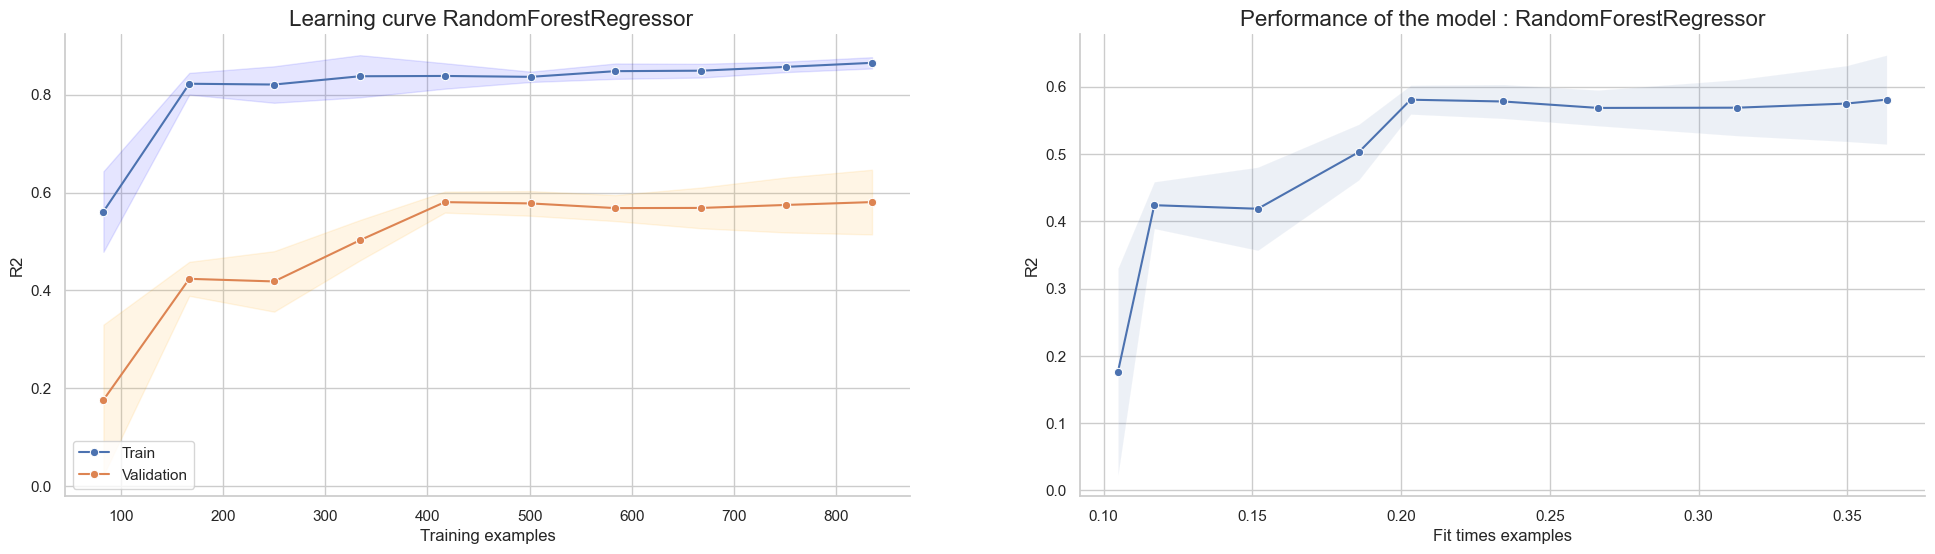

--------------------
GradientBoostingRegressor
train_score = 0.9928591653583984
test_score = 0.46562922616240526


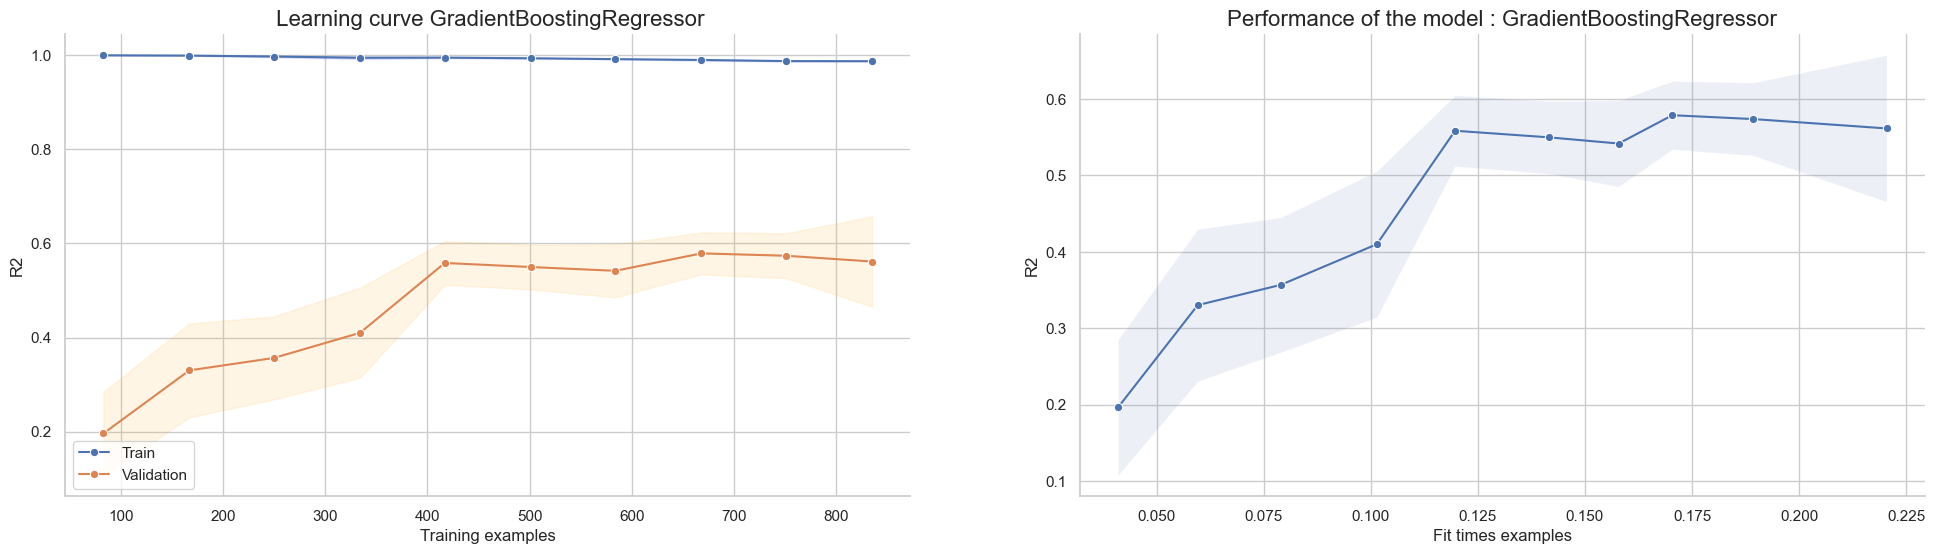

--------------------
KNeighborsRegressor
train_score = 0.33110554086154953
test_score = 0.21454573880377772


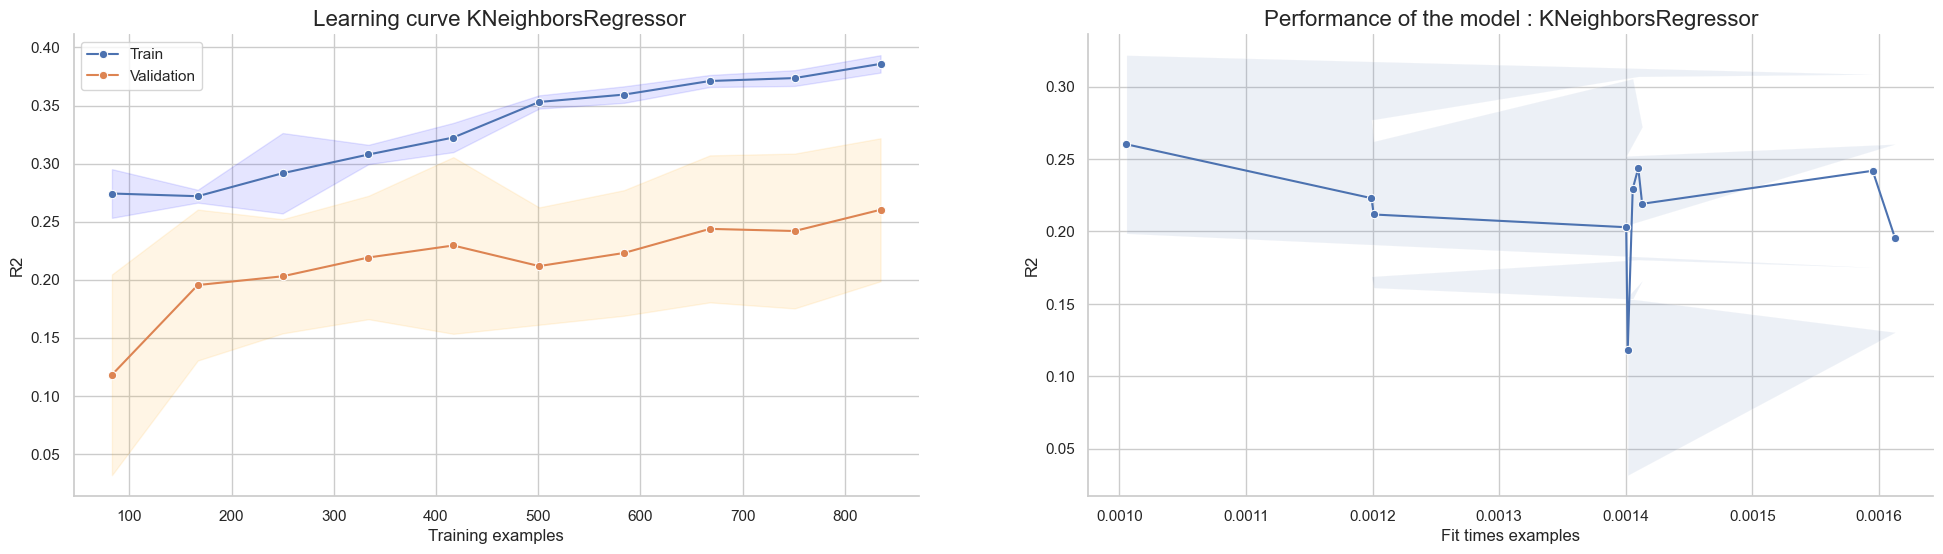

--------------------
XGBRegressor
train_score = 0.8955118304143932
test_score = 0.49603663181988084


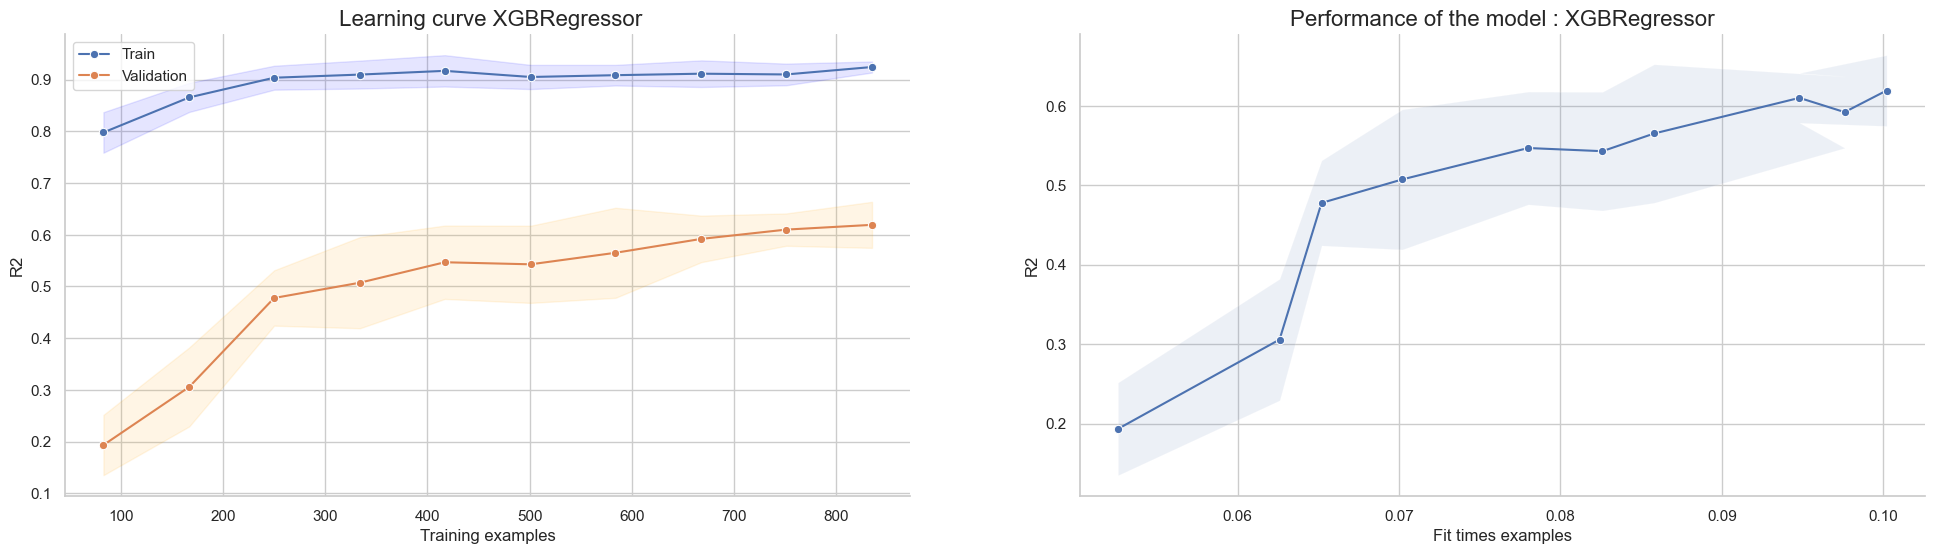

In [62]:
compare_fit_time_score(best_estimator, X_train, y_train)

** Avec y_log **

In [63]:
results_best_estimator_log = compare_models(X_train, y_train_log,X_test,y_test_log, best_estimator, k, return_metrics= False , metrics = metrics, cross_val = True)

RandomForestRegressor
CV R2_mean: 0.73
CV R2_Std:: 0.04
CV RMSE: 1.04
--------------------
GradientBoostingRegressor
CV R2_mean: 0.75
CV R2_Std:: 0.03
CV RMSE: 0.99
--------------------
KNeighborsRegressor
CV R2_mean: 0.49
CV R2_Std:: 0.06
CV RMSE: 1.42
--------------------
XGBRegressor
CV R2_mean: 0.76
CV R2_Std:: 0.03
CV RMSE: 0.97
--------------------


#### Graphique

In [64]:
# Concatenation des résultats
df_Not_StarScore = pd.concat([results_best_estimator, results_best_estimator_log], axis=0, ignore_index=True)
df_Not_StarScore['dataset'] = ['Best_Estimator'] * 4 + ['Best_Estimator_Log_Target'] * 4 

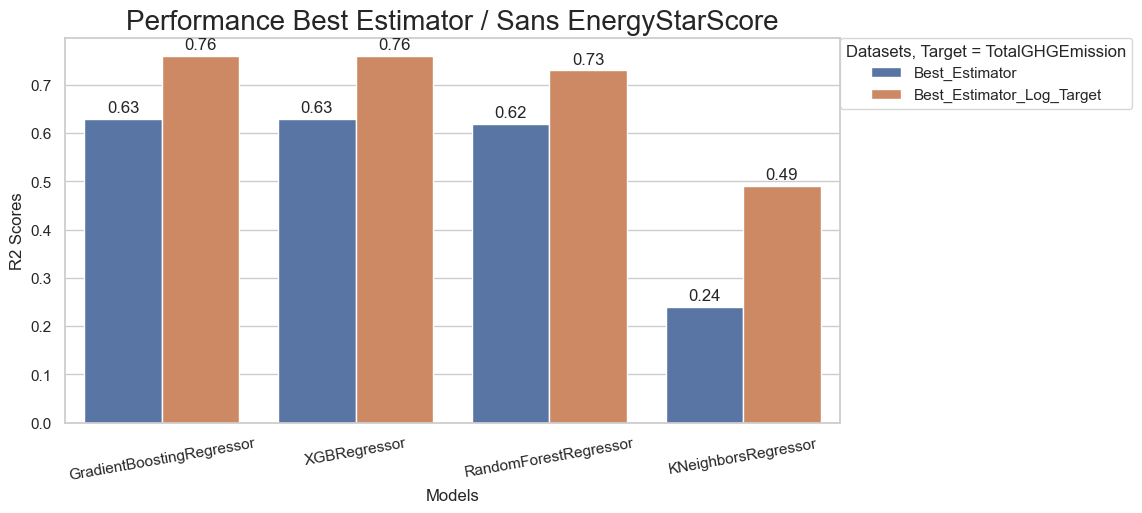

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style="whitegrid")
plot = sns.barplot(x="Model", y="R2", hue="dataset", data=df_Not_StarScore, ax=ax)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha="center", va="center", xytext=(0, 8), textcoords="offset points")

plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.xticks(rotation=10)
plt.title("Performance Best Estimator / Sans EnergyStarScore", size=20)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0, title="Datasets, Target = TotalGHGEmission")
plt.savefig("figures/GHGEM_Sans_EnrergyStarScore.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

# Avec EnergyStarScore

In [66]:
X_train = X_train_tr[modelisation_columns + Star_Score]
X_test = X_test_tr[modelisation_columns + Star_Score]
y_train_log = y_log[(list(X_train.index))]
y_test_log = y_log[(list(X_test.index))]

In [67]:
results_best_estimator_starscore = compare_models(X_train, y_train, X_test,y_test, best_estimator, k, return_metrics= False , metrics = metrics, cross_val = True)

RandomForestRegressor
CV R2_mean: 0.64
CV R2_Std:: 0.15
CV RMSE: 119.05
--------------------
GradientBoostingRegressor
CV R2_mean: 0.67
CV R2_Std:: 0.14
CV RMSE: 118.82
--------------------
KNeighborsRegressor
CV R2_mean: 0.2
CV R2_Std:: 0.13
CV RMSE: 182.6
--------------------
XGBRegressor
CV R2_mean: 0.64
CV R2_Std:: 0.17
CV RMSE: 116.66
--------------------


--------------------
RandomForestRegressor
train_score = 0.8232994452447554
test_score = 0.5118636462823012


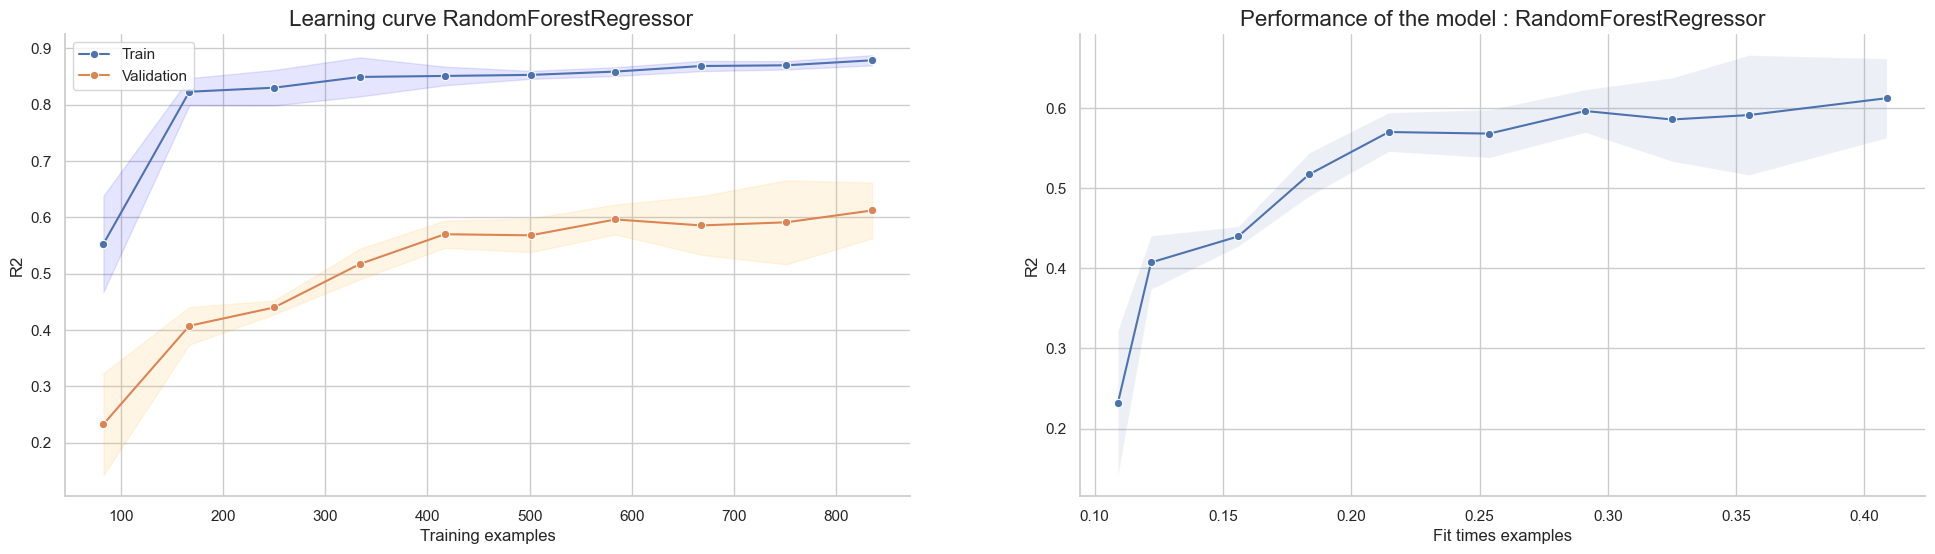

--------------------
GradientBoostingRegressor
train_score = 0.994811431298965
test_score = 0.5030696817967062


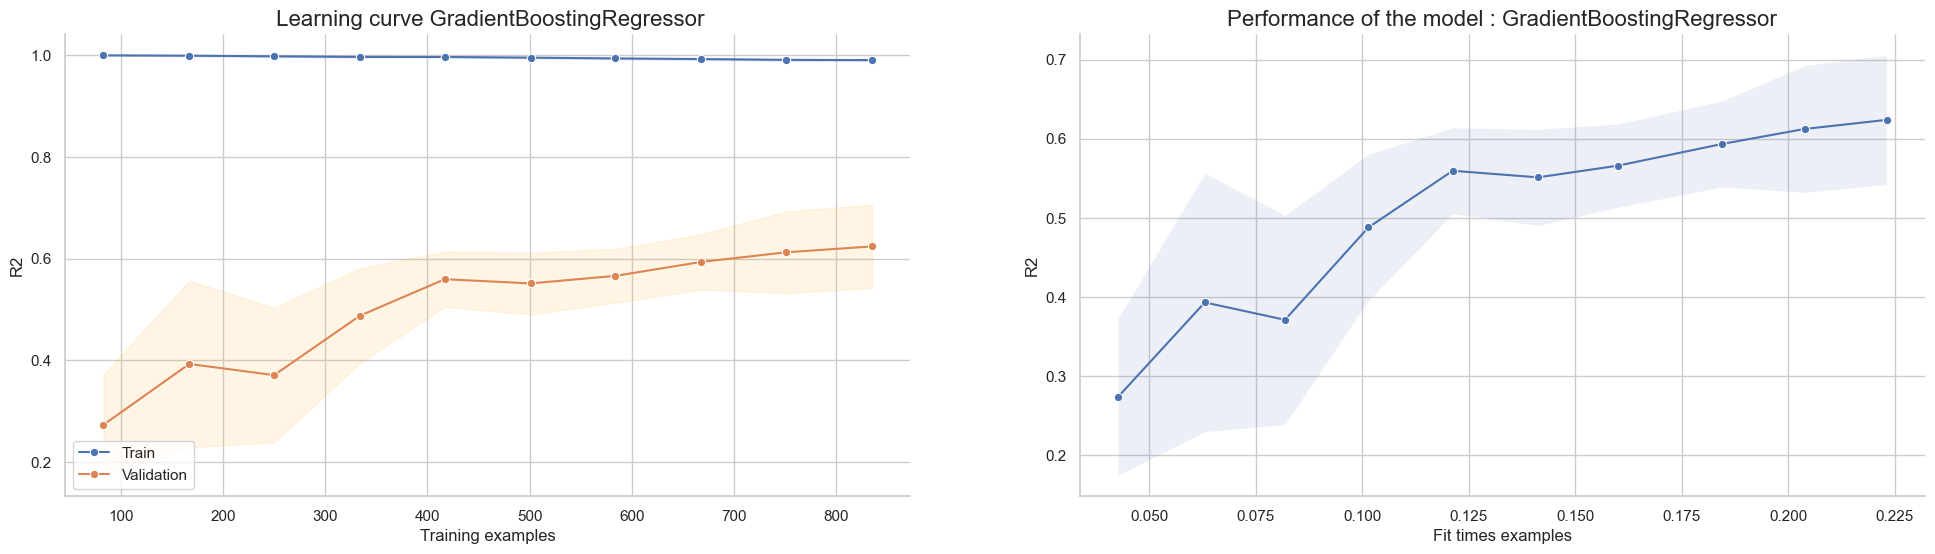

--------------------
KNeighborsRegressor
train_score = 0.3145206606019342
test_score = 0.17775200662511204


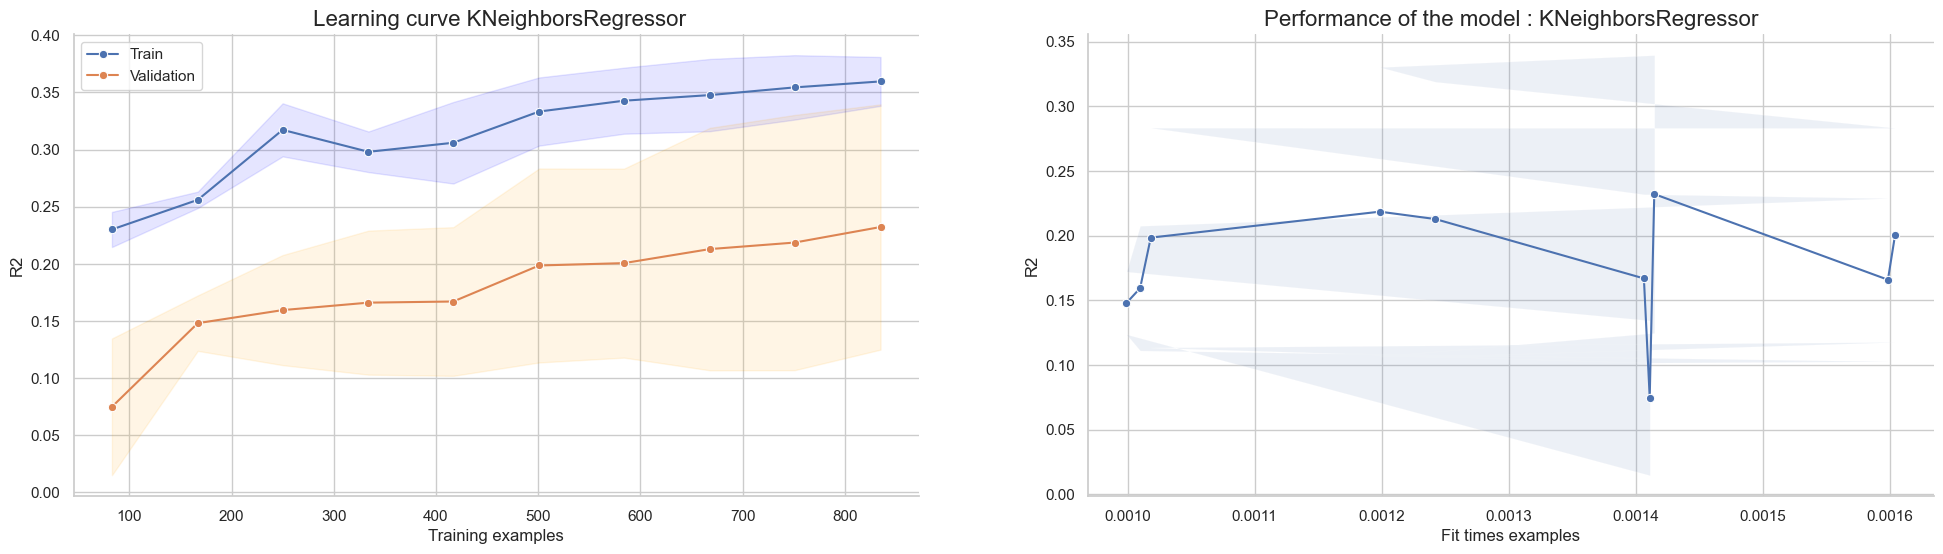

--------------------
XGBRegressor
train_score = 0.9043959469723991
test_score = 0.5083361988559694


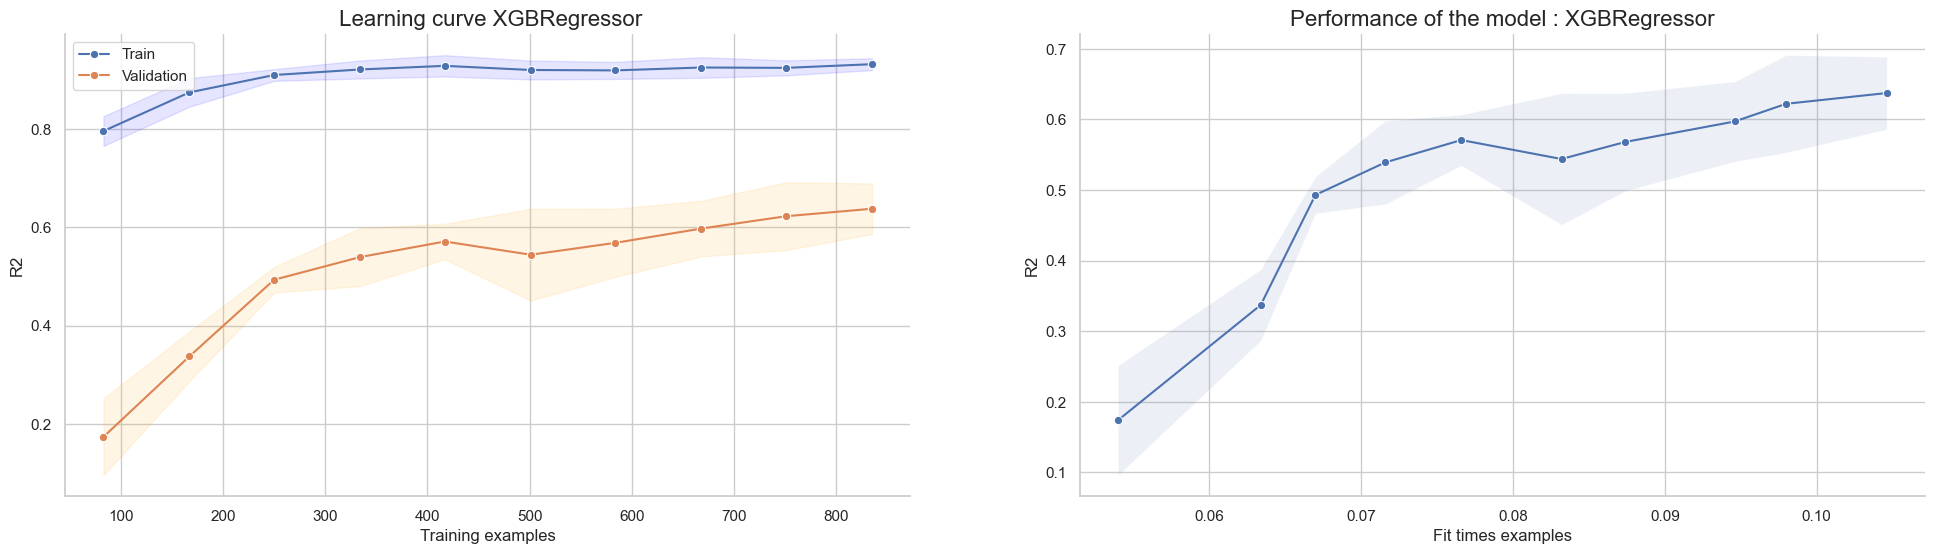

In [68]:
compare_fit_time_score(best_estimator, X_train, y_train)

** Avec y_log **

In [69]:
results_best_estimator_starscore_log = compare_models(X_train, y_train_log,X_test,y_test_log, best_estimator, k, return_metrics= False , metrics = metrics, cross_val = True)

RandomForestRegressor
CV R2_mean: 0.76
CV R2_Std:: 0.03
CV RMSE: 0.97
--------------------
GradientBoostingRegressor
CV R2_mean: 0.81
CV R2_Std:: 0.03
CV RMSE: 0.89
--------------------
KNeighborsRegressor
CV R2_mean: 0.47
CV R2_Std:: 0.06
CV RMSE: 1.45
--------------------
XGBRegressor
CV R2_mean: 0.81
CV R2_Std:: 0.03
CV RMSE: 0.87
--------------------


#### Graphique

In [70]:
# Concatenation des résultats
df_Not_StarScore = pd.concat([results_best_estimator_starscore, results_best_estimator_starscore_log], axis=0, ignore_index=True)
df_Not_StarScore['dataset'] = ['Best_Estimator'] * 4 + ['Best_Estimator_Log_Target'] * 4 

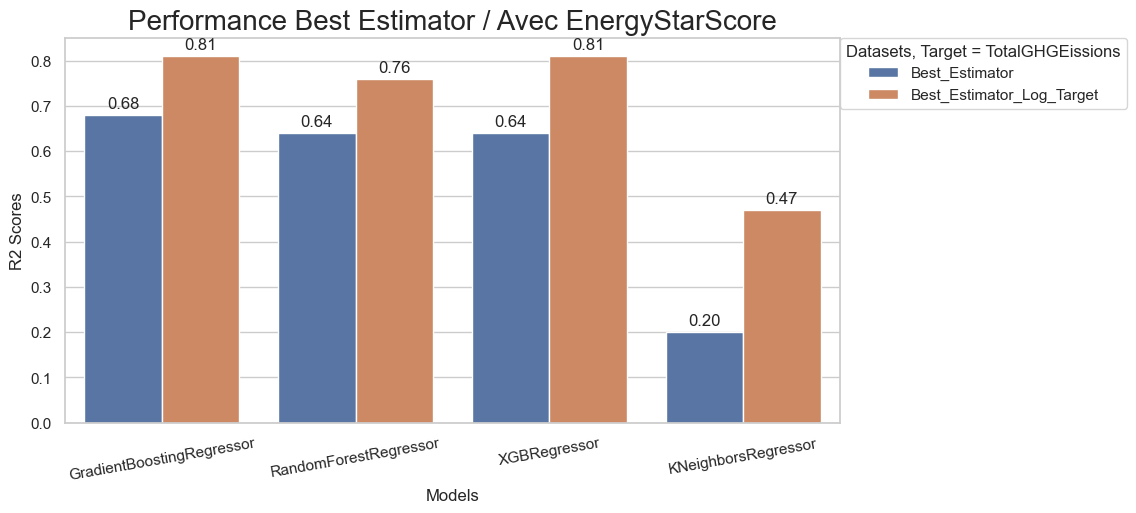

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style="whitegrid")
plot = sns.barplot(x="Model", y="R2", hue="dataset", data=df_Not_StarScore, ax=ax)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha="center", va="center", xytext=(0, 8), textcoords="offset points")

plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.xticks(rotation=10)
plt.title("Performance Best Estimator / Avec EnergyStarScore", size=20)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0, title="Datasets, Target = TotalGHGEissions")
plt.savefig("figures/GHGEM_Avec_EnrergyStarScore.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

# Graphique comparaison

In [59]:
# Concatenation des résultats
df_comparaison = pd.concat([results_best_estimator, results_best_estimator_with_starscore], axis=0, ignore_index=True)
df_comparaison['dataset'] = ['Not_StarScore'] * 4 + ['With_StarScore_Log'] * 4 

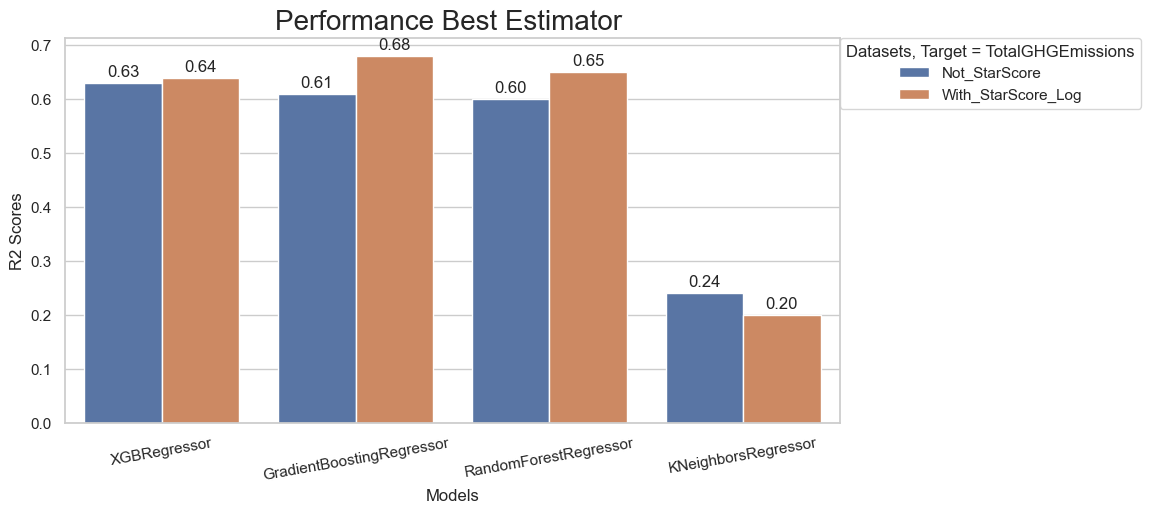

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style="whitegrid")
plot = sns.barplot(x="Model", y="R2", hue="dataset", data=df_comparaison, ax=ax)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha="center", va="center", xytext=(0, 8), textcoords="offset points")

plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.xticks(rotation=10)
plt.title("Performance Best Estimator ", size=20)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0, title="Datasets, Target = TotalGHGEmissions")
plt.savefig("figures/Modelisation_CO2_avec_et_Sans_StarScore.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

# Interpretation SHAP values - TotalGHGEmissions - Sans EnergyStarScore 

In [72]:
X_train = X_train_tr[modelisation_columns]
X_test = X_test_tr[modelisation_columns]
y_train_log = y_log[(list(X_train.index))]
y_test_log = y_log[(list(X_test.index))]

In [73]:
import shap

In [74]:
model = GradientBoostingRegressor(**Best_param_gradienboost)
# bagging = BaggingRegressor(base_estimator=model, n_estimators=30, random_state=0)
model.fit(X_train, y_train_log)

GradientBoostingRegressor(learning_rate=0.07, max_depth=6,
                          subsample=0.6000000000000001)

In [75]:
explainer = shap.Explainer(model.predict, X_train)

In [76]:
shap_values = explainer(X_test)

Permutation explainer: 262it [00:19,  7.31it/s]                         


In [78]:
import pickle

In [79]:
# Pour sauvegarder les shap values

with open('Shap_Values_LogTarget_GHGEM', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(shap_values)

In [88]:
# Pour les importer
with open('Shap_Values_LogTarget_GHGEM', 'rb') as fichier:
    my_depickler = pickle.Unpickler(fichier)
    shap_values = my_depickler.load()

### Plot a global summary

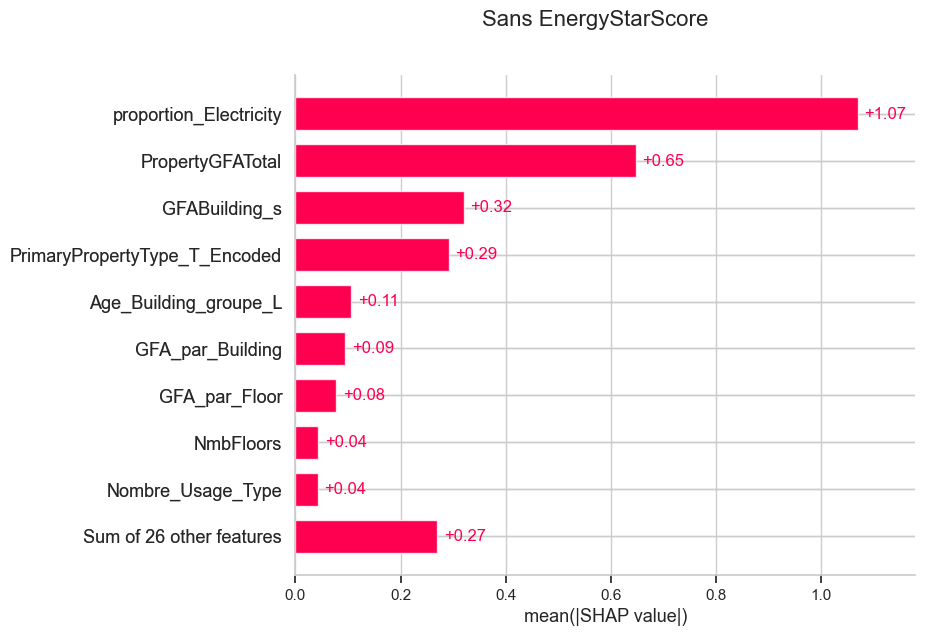

In [89]:
shap.plots.bar(shap_values, max_display=10, show=False)
fig = plt.gcf()
fig.suptitle('Sans EnergyStarScore', fontsize=16)
plt.savefig("figures/global_ghgem.png", transparent=True, bbox_inches='tight', dpi=200)

### Plot a single instance

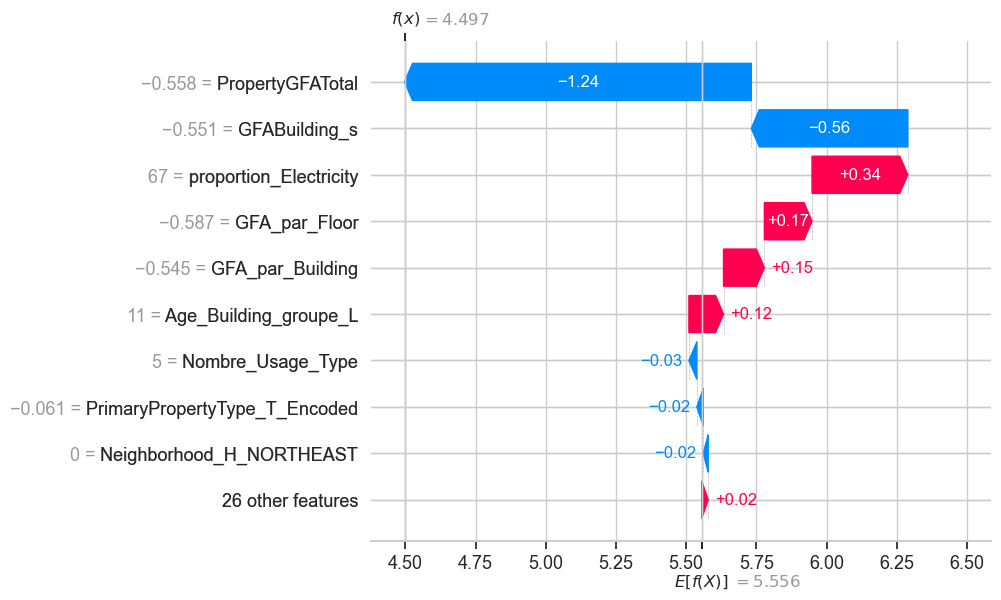

In [90]:
shap.plots.waterfall(shap_values[0], max_display=10)

### A simple beeswarm summary plot

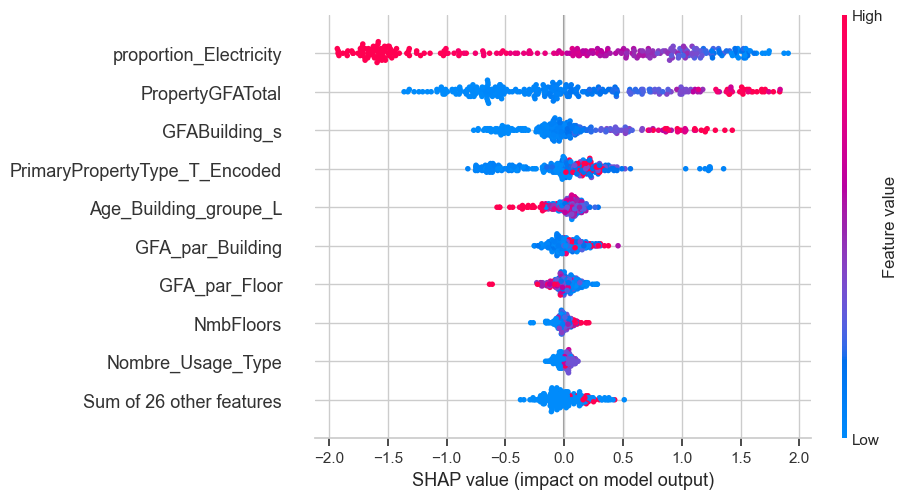

In [91]:
shap.plots.beeswarm(shap_values, max_display=10)

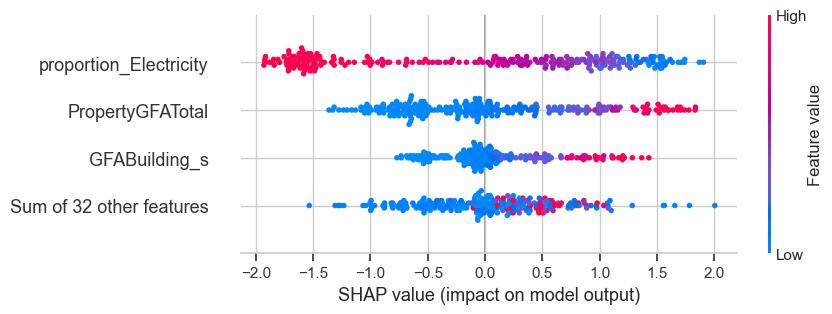

In [92]:
shap.plots.beeswarm(shap_values, max_display=4)

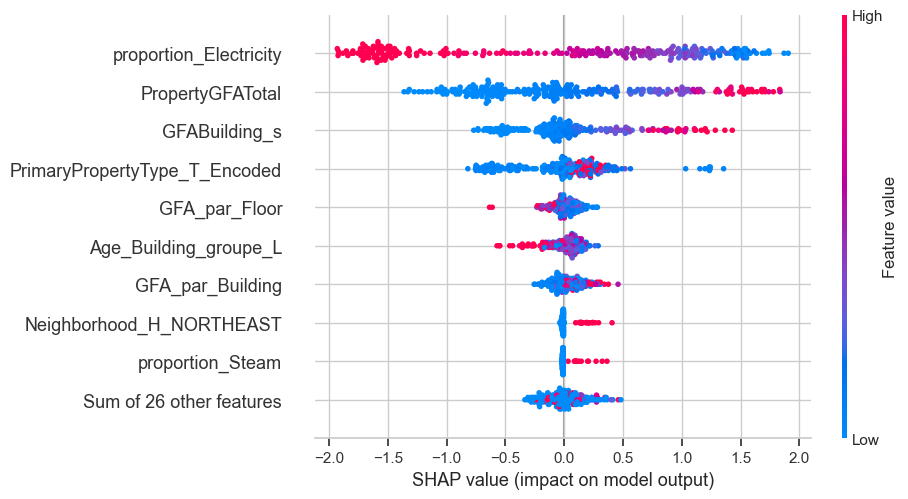

In [93]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

### Useful transforms

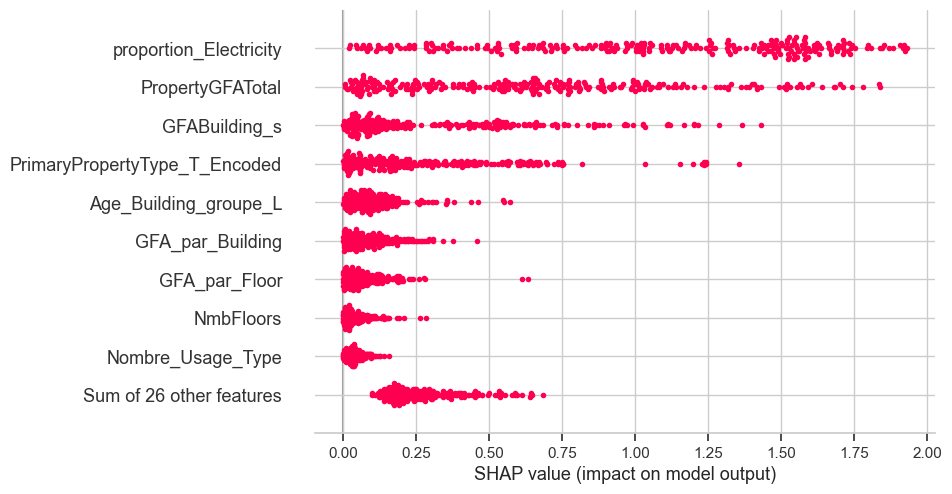

In [94]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

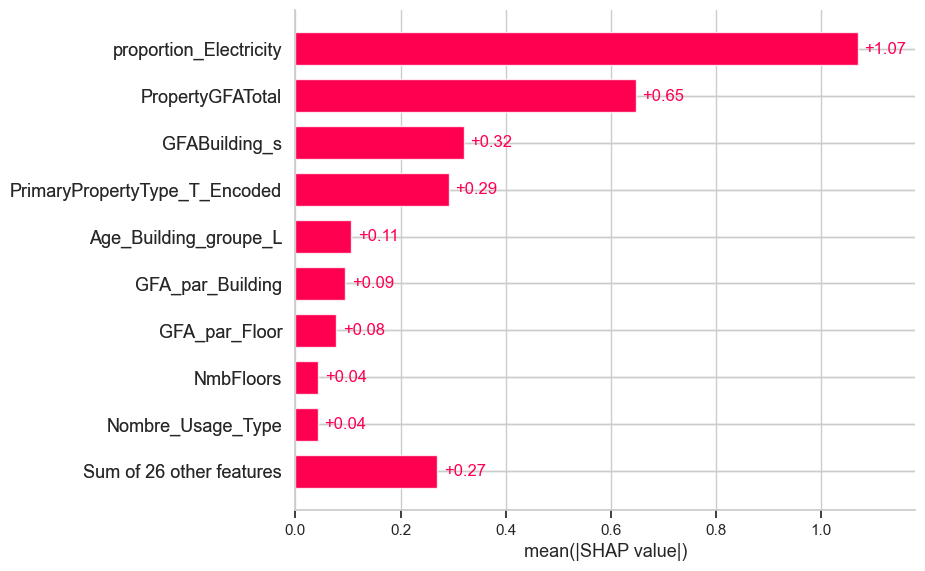

In [95]:
shap.plots.bar(shap_values.abs.mean(0))

## bar plot

### Global bar plot

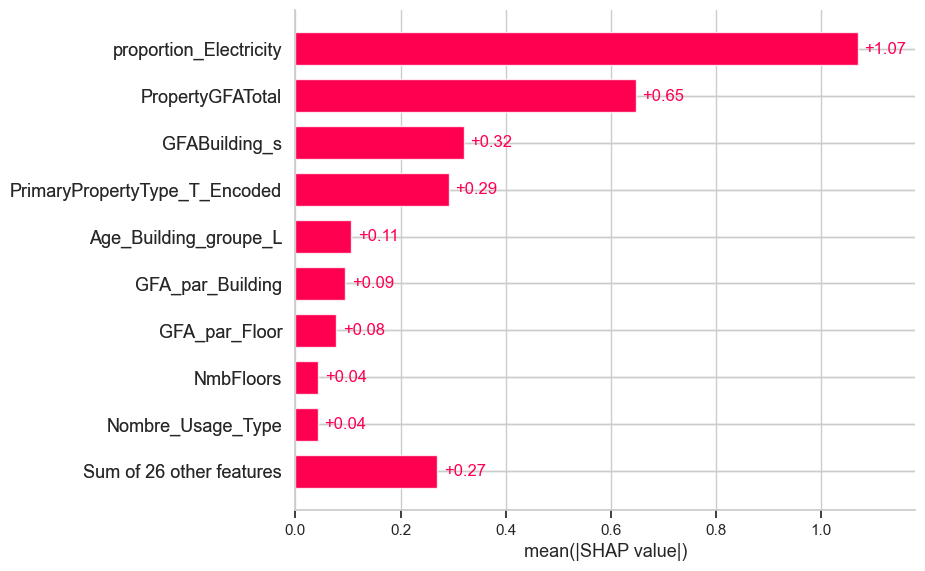

In [96]:
shap.plots.bar(shap_values)

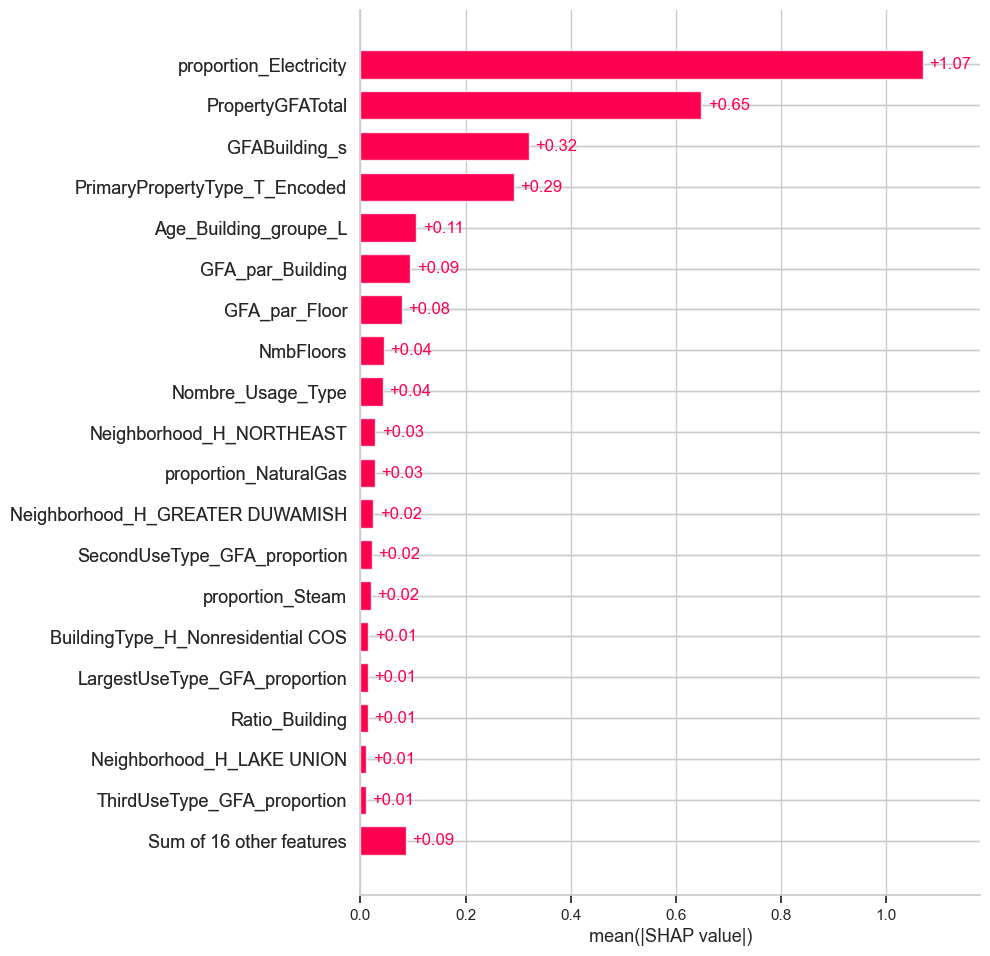

In [97]:
shap.plots.bar(shap_values, max_display=20)

### Local bar plot

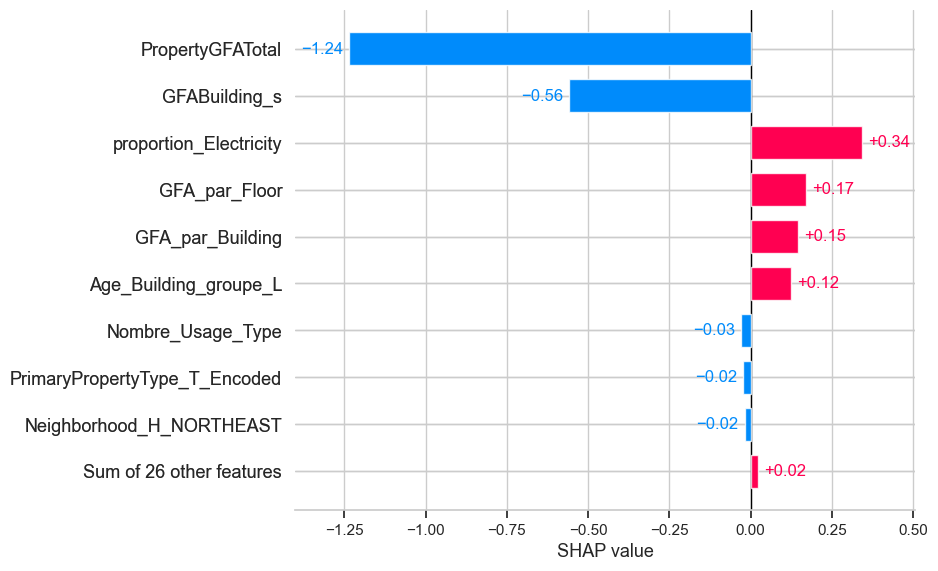

In [98]:
shap.plots.bar(shap_values[0])

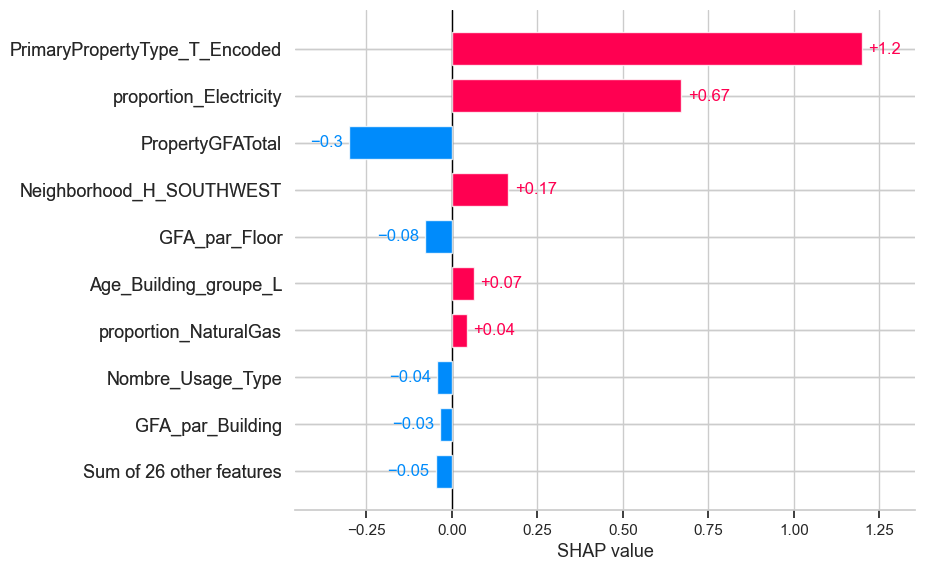

In [99]:
shap.plots.bar(shap_values[250])

### Cohort bar plot

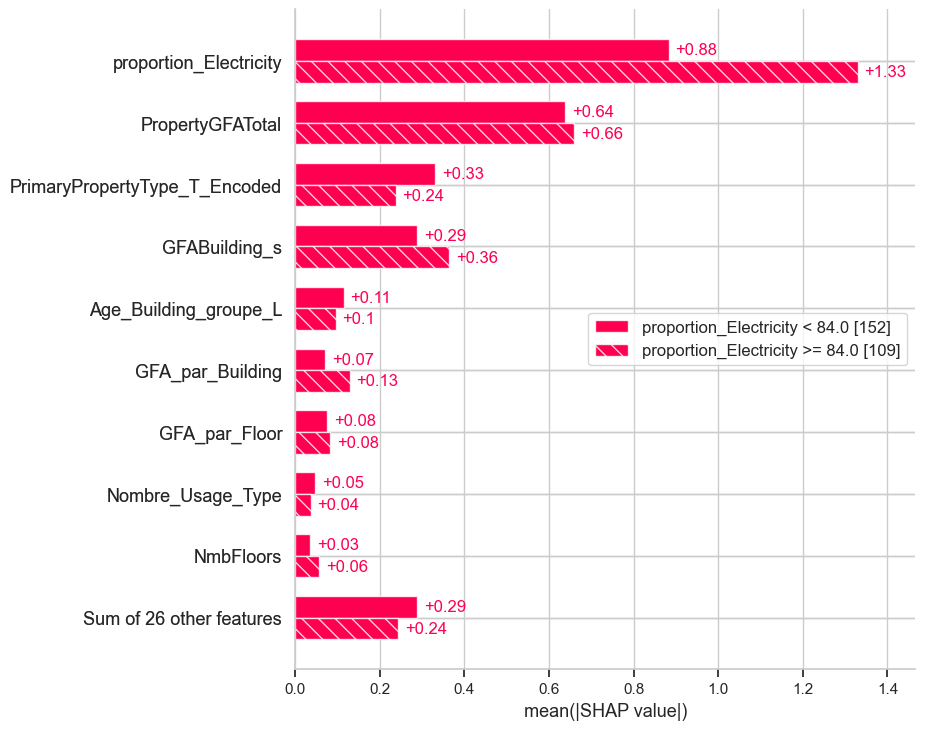

In [100]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

## heatmap plot

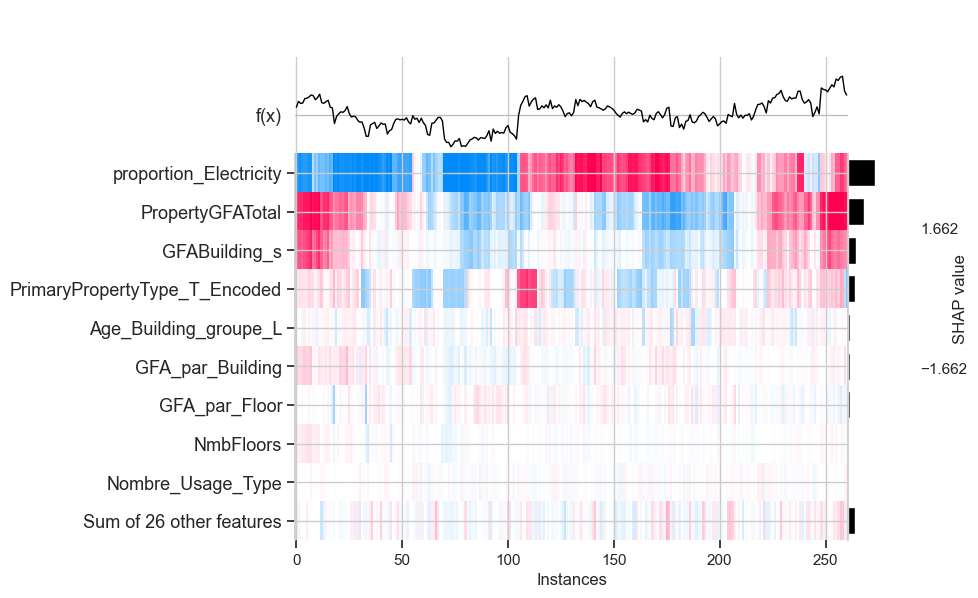

In [101]:
shap.plots.heatmap(shap_values)

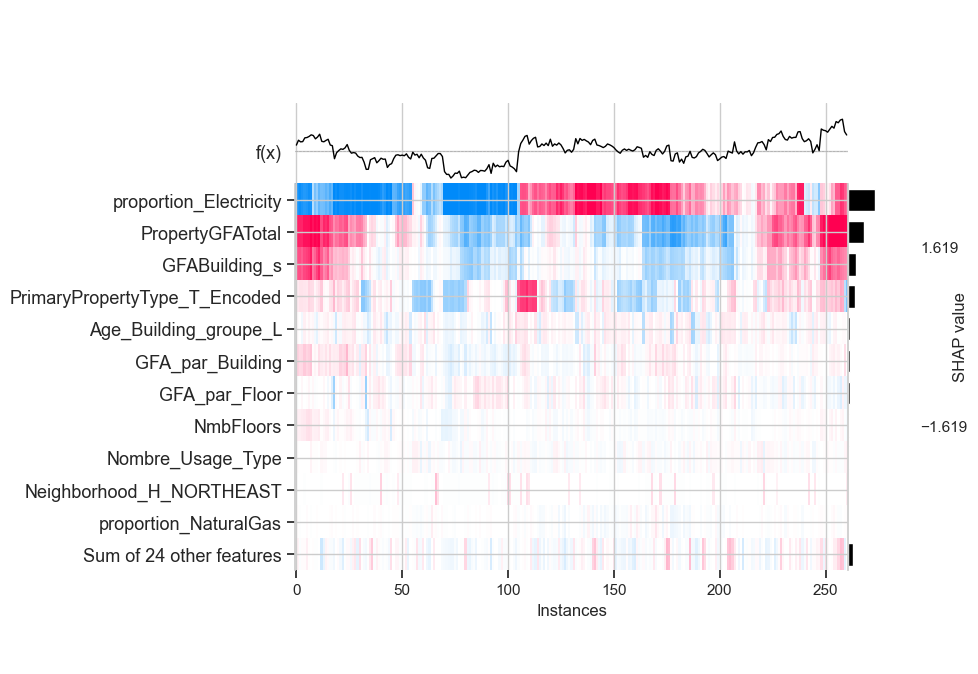

In [102]:
# Increasing the max_display parameter allows for more features to be shown:
shap.plots.heatmap(shap_values, max_display=12)

### Changing sort order and global feature importance values

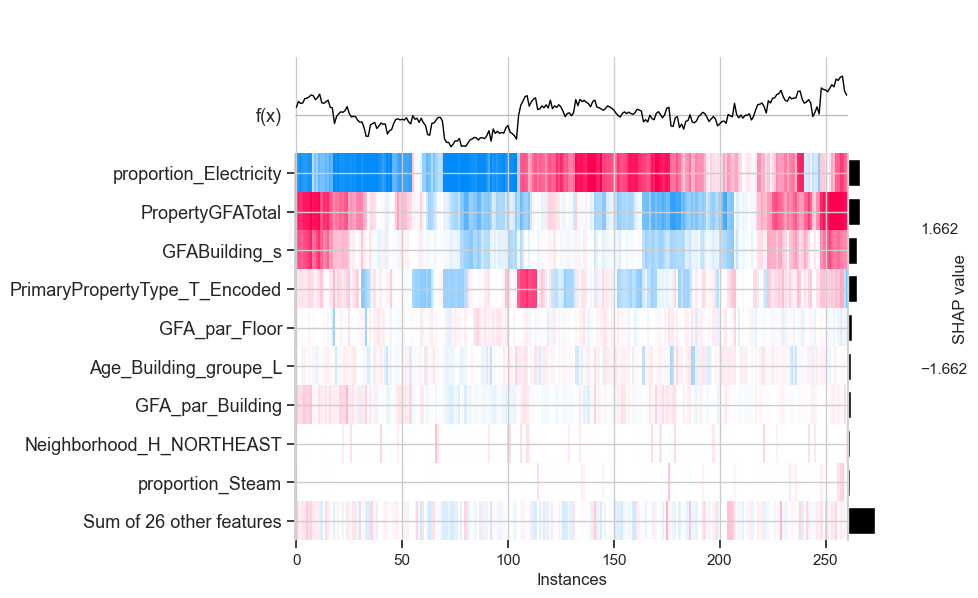

In [103]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

## scatter plot

### Simple dependence scatter plot

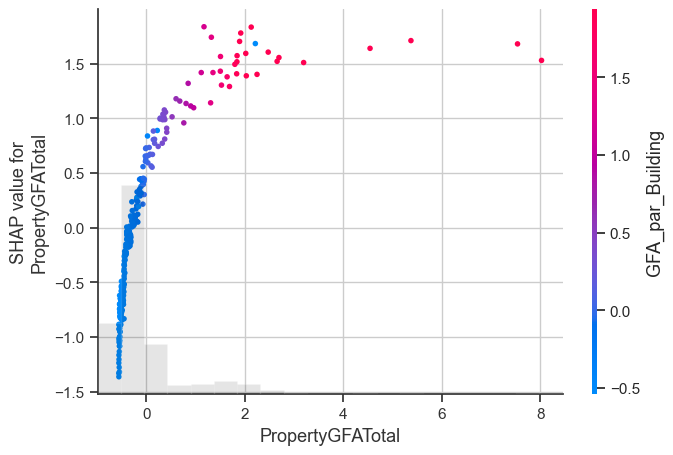

In [104]:
# PropertyGFATotal
shap.plots.scatter(shap_values[:,"PropertyGFATotal"], color=shap_values)

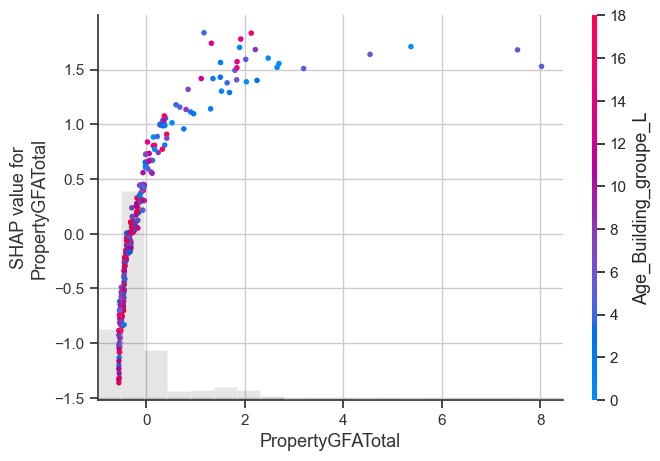

In [105]:
shap.plots.scatter(shap_values[:, "PropertyGFATotal"], color=shap_values[:,"Age_Building_groupe_L"])

### Using global feature importance orderings

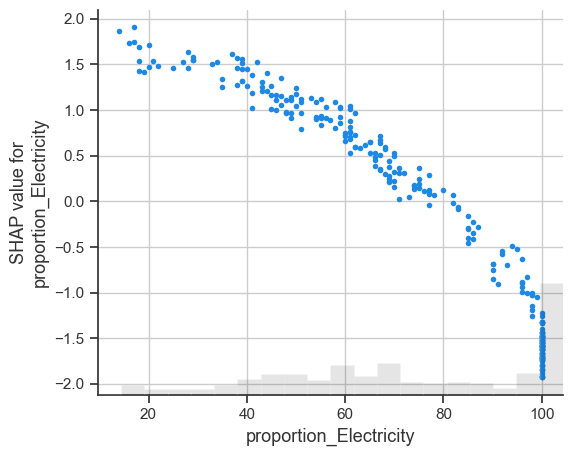

In [106]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

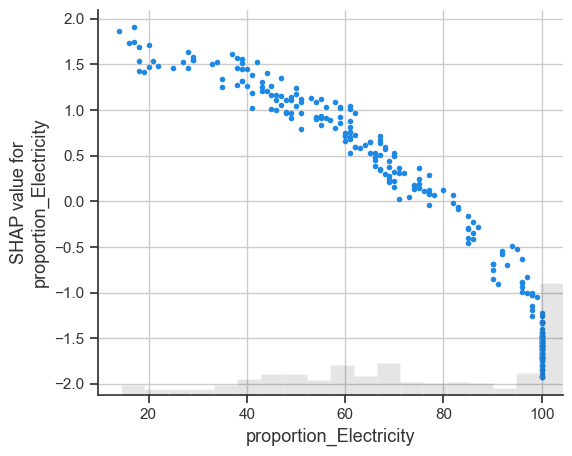

In [107]:
shap.plots.scatter(shap_values[:, shap_values.abs.max(0).argsort[-1]])

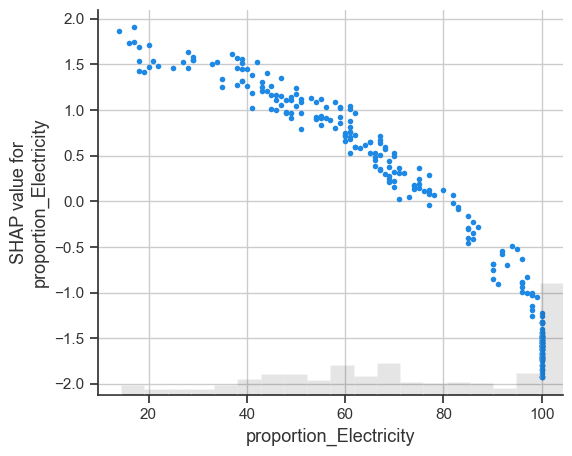

In [108]:
shap.plots.scatter(shap_values[:, shap_values.abs.percentile(95, 0).argsort[-1]])

### Exploring different interaction colorings

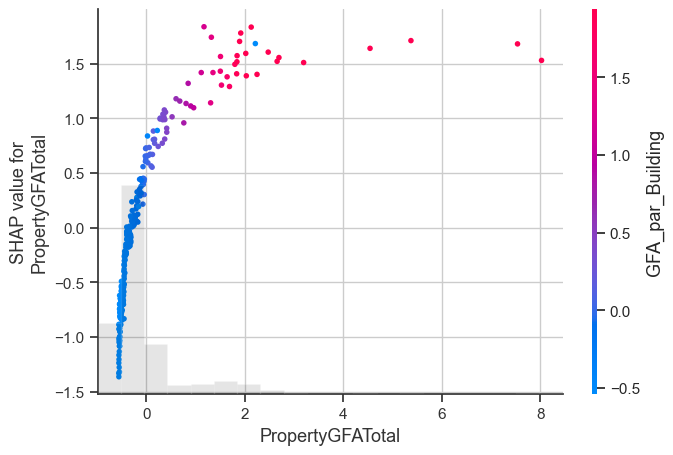

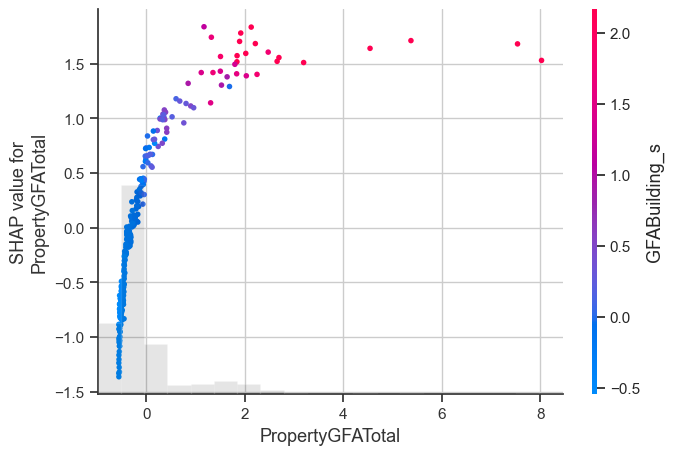

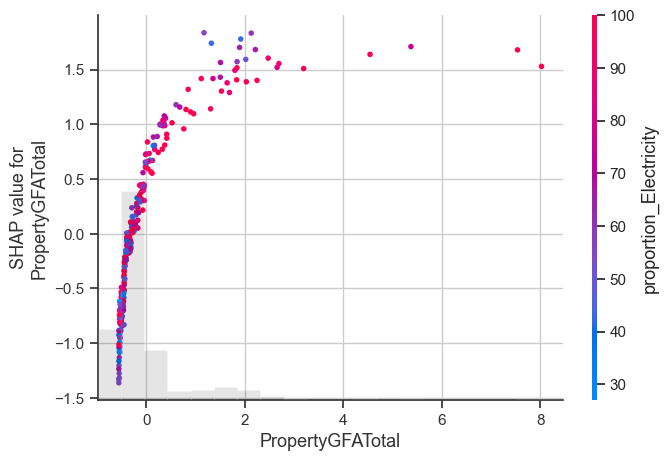

In [109]:
inds = shap.utils.potential_interactions(shap_values[:, "PropertyGFATotal"], shap_values)
for i in range(3):
    shap.plots.scatter(shap_values[:,"PropertyGFATotal"], color=shap_values[:,inds[i]])

# Interpretation SHAP values - TotalGHGEmissions - Avec EnergyStarScore

In [81]:
X_train = X_train_tr[modelisation_columns + Star_Score]
X_test = X_test_tr[modelisation_columns + Star_Score]
y_train_log = y_log[(list(X_train.index))]
y_test_log = y_log[(list(X_test.index))]

In [82]:
model = GradientBoostingRegressor(**Best_param_gradienboost)
# bagging = BaggingRegressor(base_estimator=model, n_estimators=30, random_state=0)
model.fit(X_train, y_train_log)

GradientBoostingRegressor(learning_rate=0.07, max_depth=6,
                          subsample=0.6000000000000001)

In [83]:
explainer = shap.Explainer(model.predict, X_train)

In [84]:
shap_values = explainer(X_test)

Permutation explainer: 262it [00:19,  6.31it/s]                         


In [85]:
import pickle

In [86]:
# Pour sauvegarder les shap values

with open('Shap_Values_LogTarget_GHGEM_StarScore', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(shap_values)

In [110]:
# Pour les importer
with open('Shap_Values_LogTarget_GHGEM_StarScore', 'rb') as fichier:
    my_depickler = pickle.Unpickler(fichier)
    shap_values = my_depickler.load()

### Plot a global summary

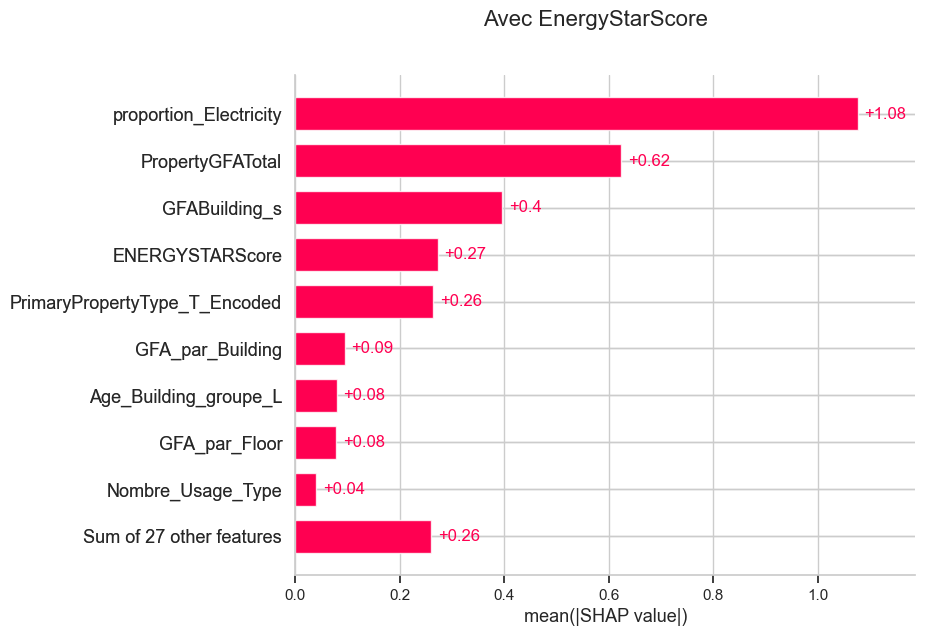

In [111]:
shap.plots.bar(shap_values, max_display=10, show=False)
fig = plt.gcf()
fig.suptitle('Avec EnergyStarScore', fontsize=16)
plt.savefig("figures/global_ghgem_starscore.png", transparent=True, bbox_inches='tight', dpi=200)

### Plot a single instance

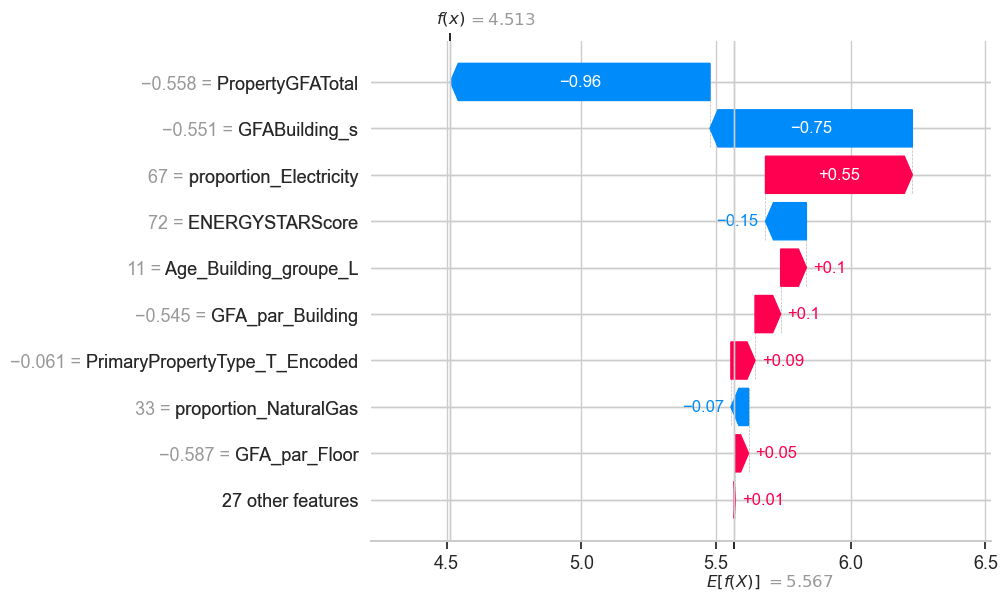

In [112]:
shap.plots.waterfall(shap_values[0], max_display=10)

### A simple beeswarm summary plot

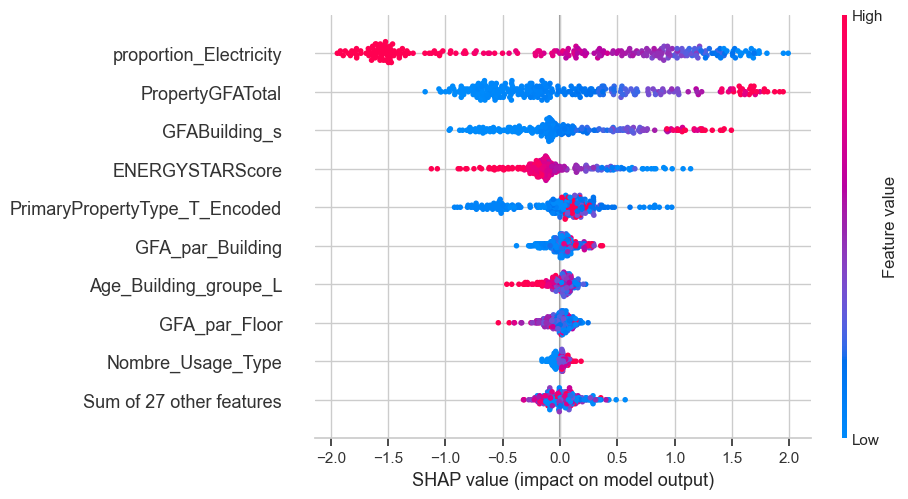

In [113]:
shap.plots.beeswarm(shap_values, max_display=10)

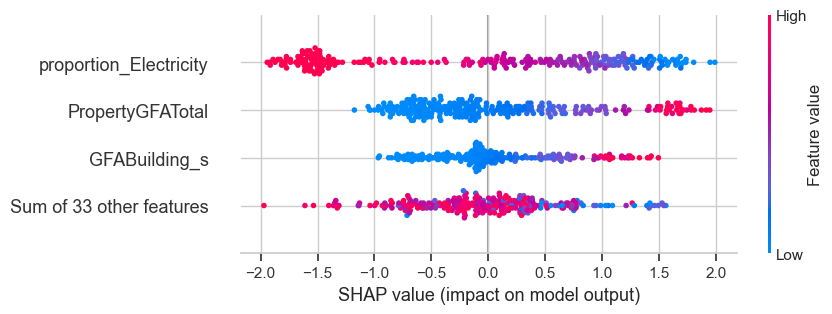

In [114]:
shap.plots.beeswarm(shap_values, max_display=4)

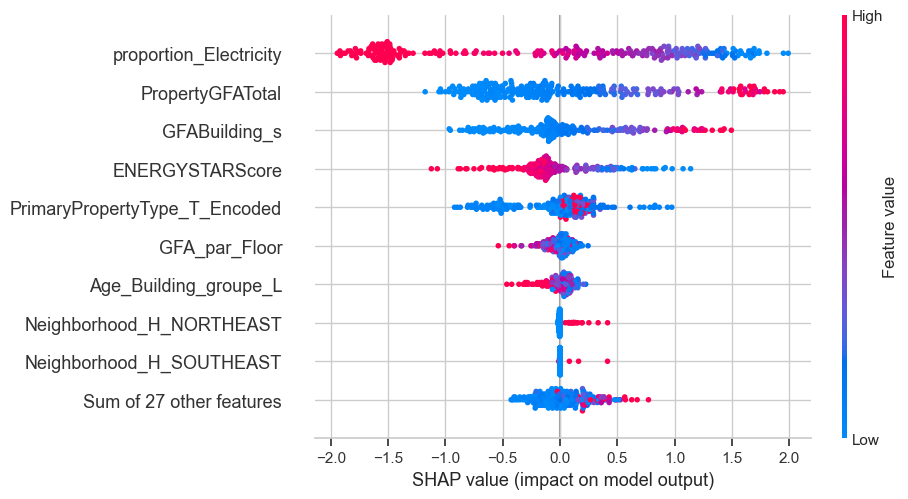

In [115]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

### Useful transforms

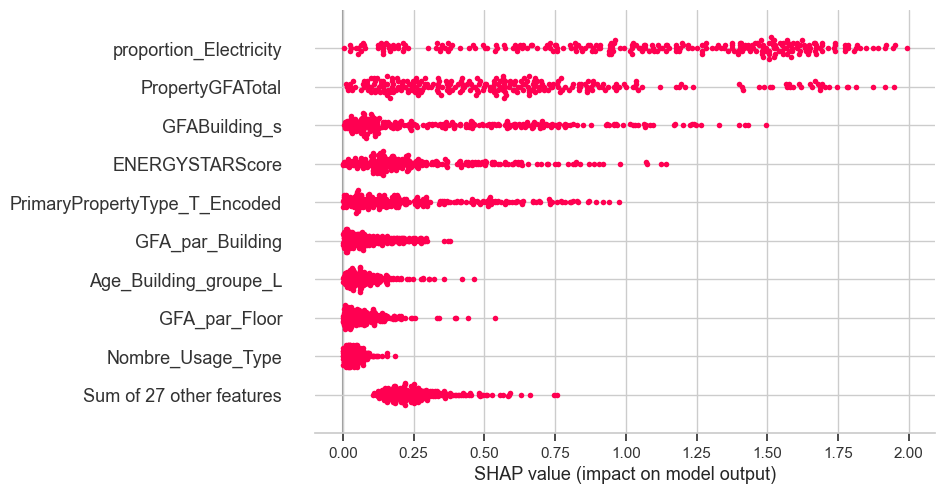

In [116]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

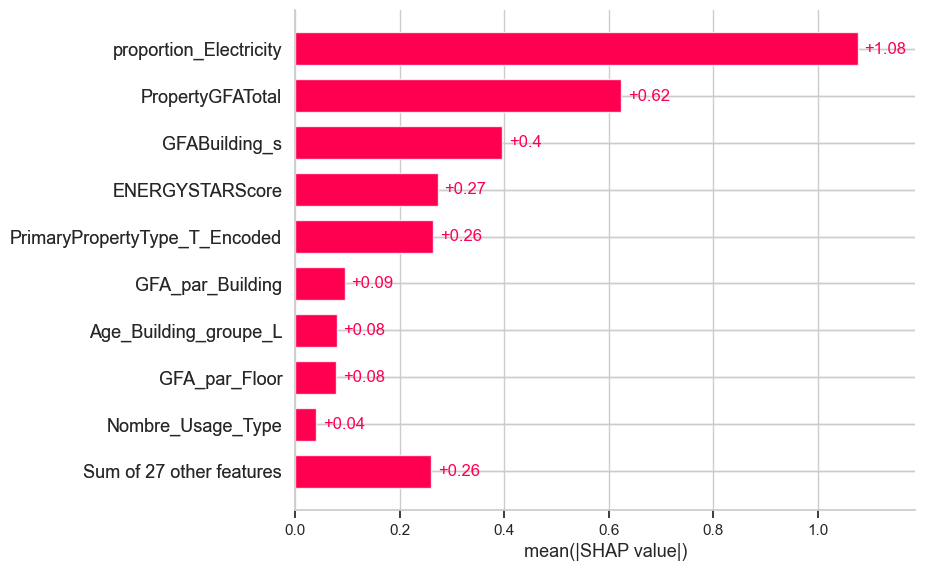

In [117]:
shap.plots.bar(shap_values.abs.mean(0))

## bar plot

### Global bar plot

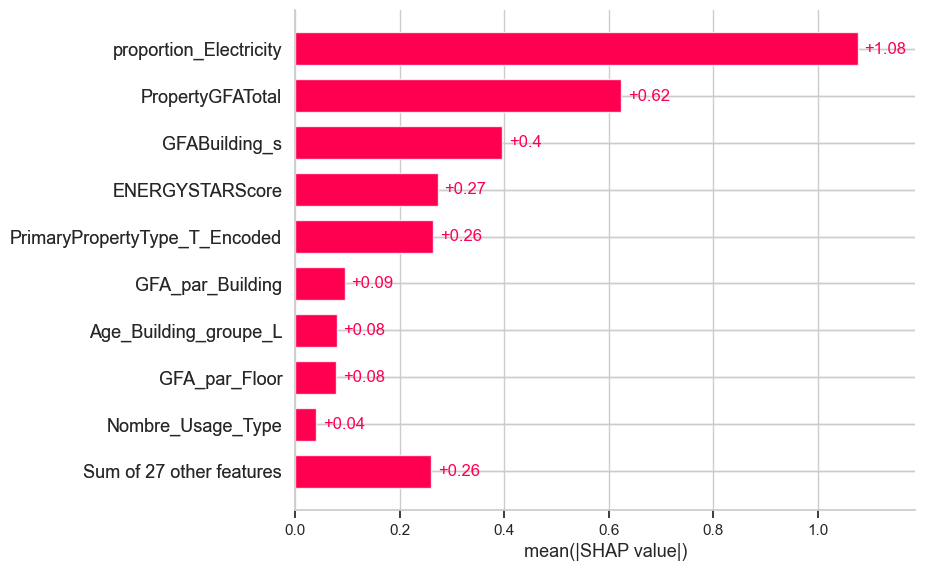

In [118]:
shap.plots.bar(shap_values)

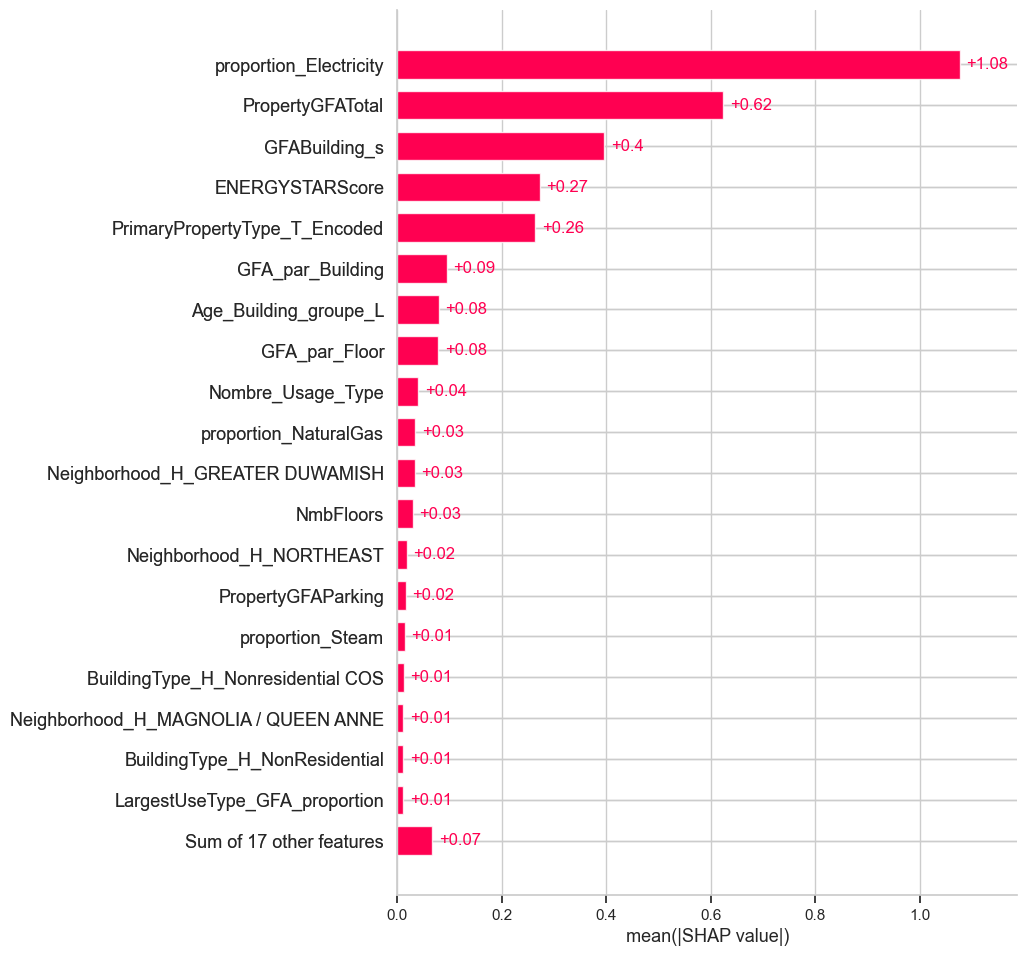

In [119]:
shap.plots.bar(shap_values, max_display=20)

### Local bar plot

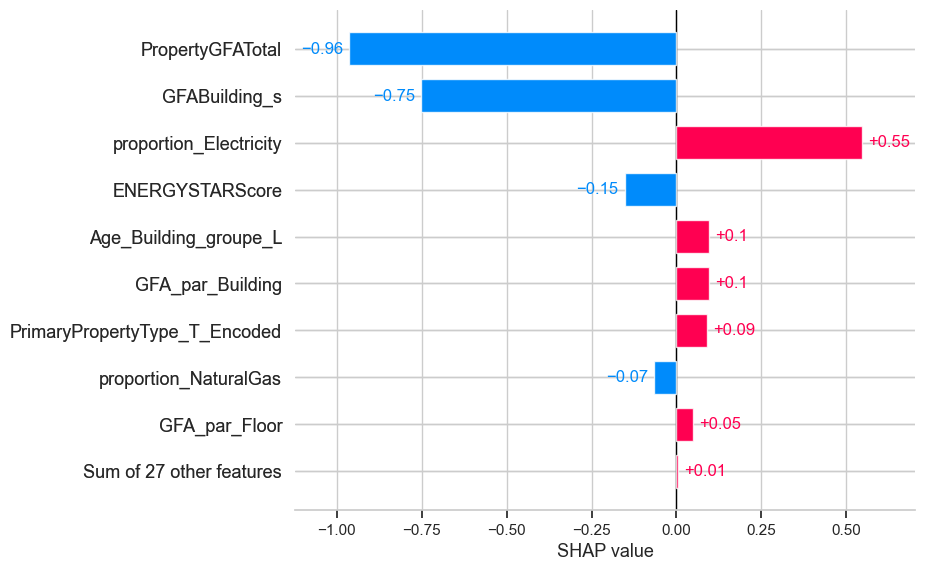

In [120]:
shap.plots.bar(shap_values[0])

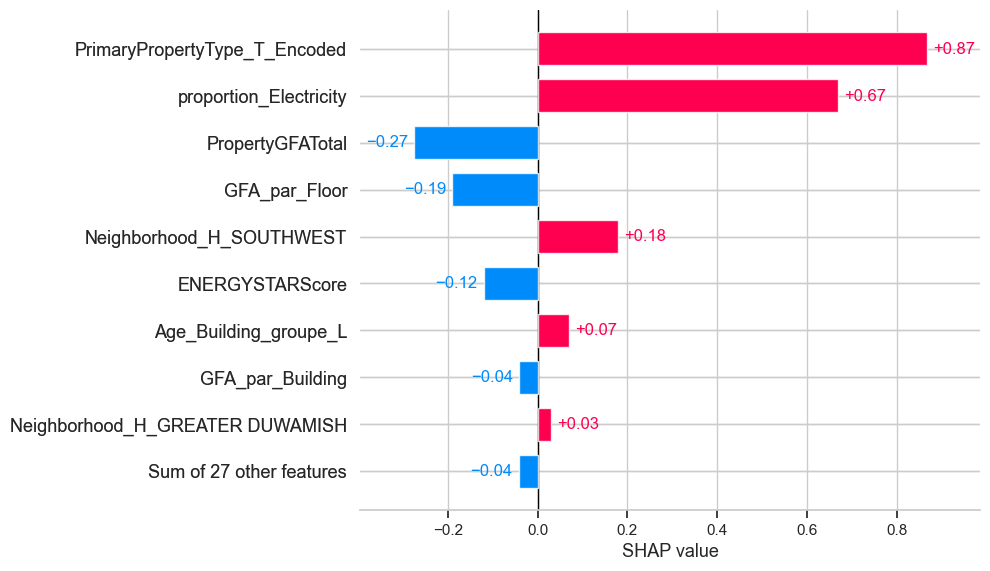

In [121]:
shap.plots.bar(shap_values[250])

### Cohort bar plot

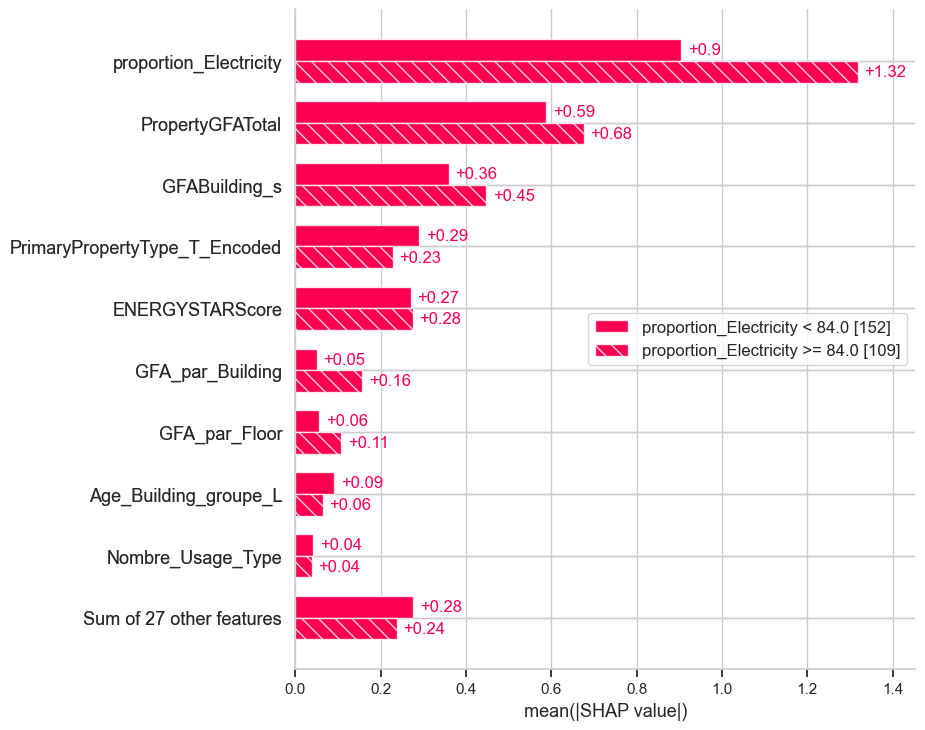

In [122]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

## heatmap plot

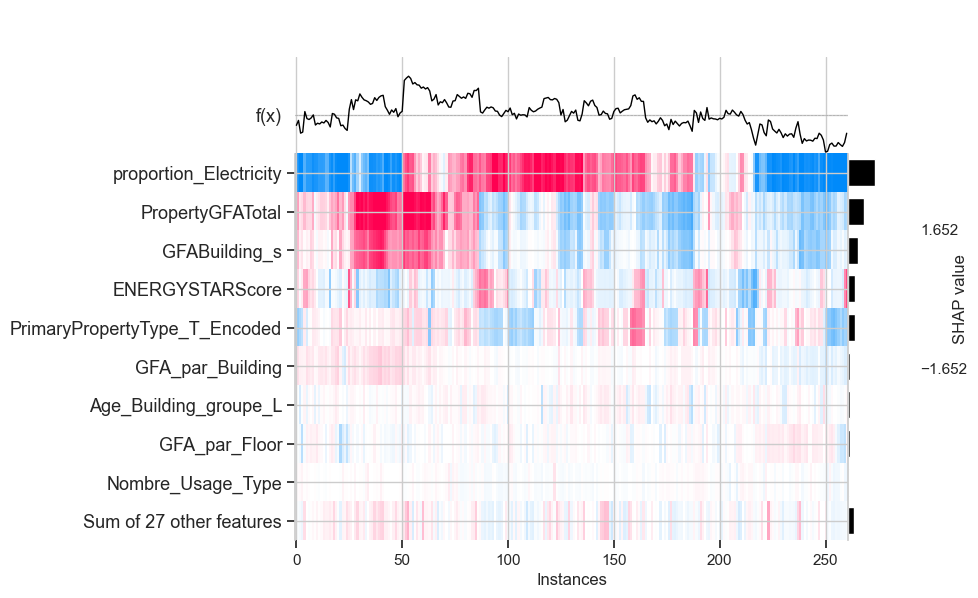

In [123]:
shap.plots.heatmap(shap_values)

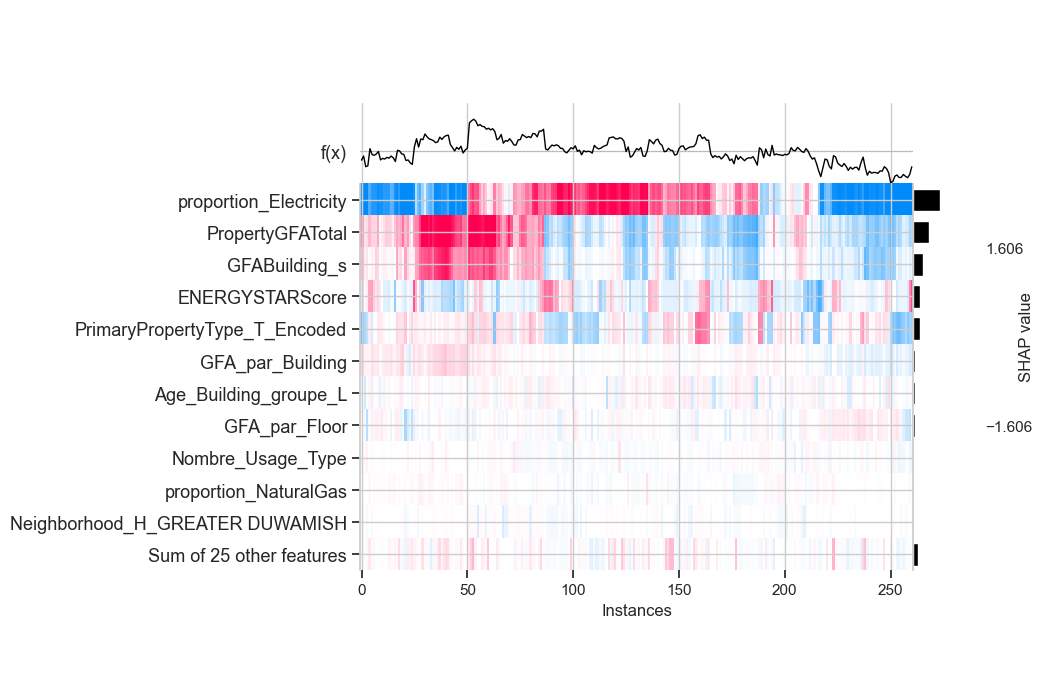

In [124]:
# Increasing the max_display parameter allows for more features to be shown:
shap.plots.heatmap(shap_values, max_display=12)

### Changing sort order and global feature importance values

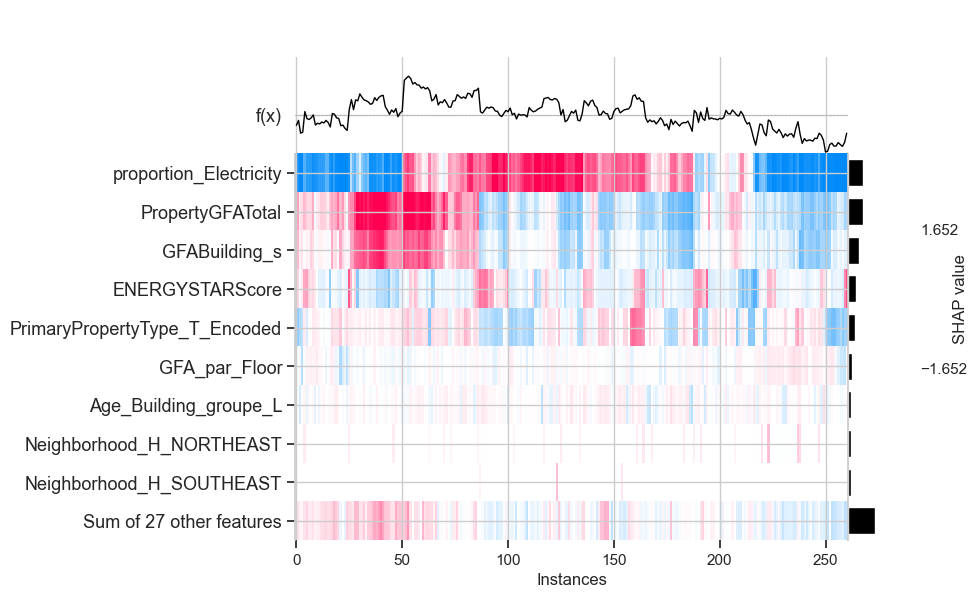

In [125]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

## scatter plot

### Simple dependence scatter plot

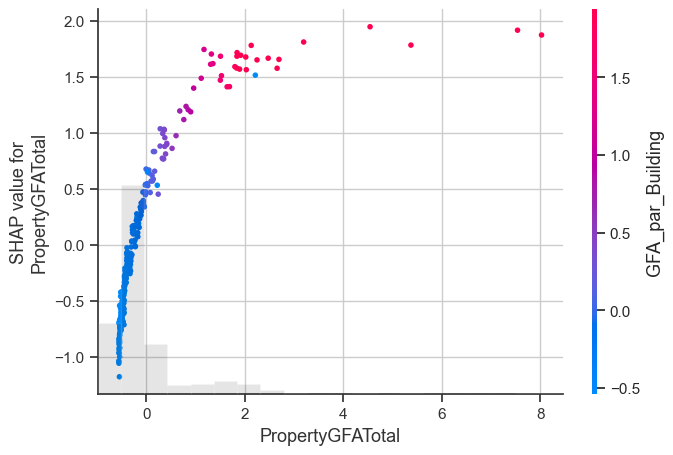

In [126]:
# PropertyGFATotal
shap.plots.scatter(shap_values[:,"PropertyGFATotal"], color=shap_values)

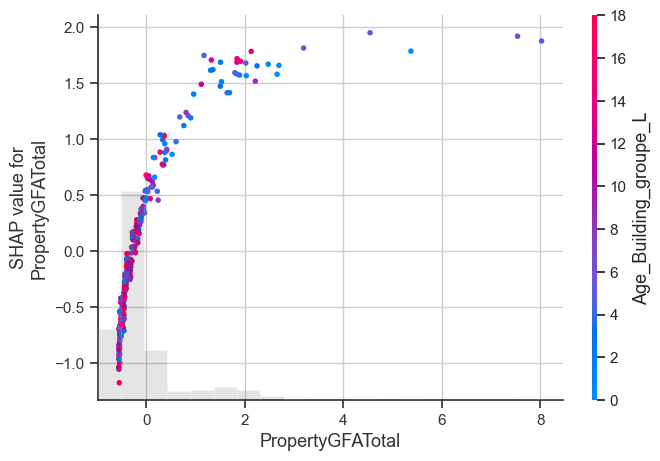

In [127]:
shap.plots.scatter(shap_values[:, "PropertyGFATotal"], color=shap_values[:,"Age_Building_groupe_L"])

### Using global feature importance orderings

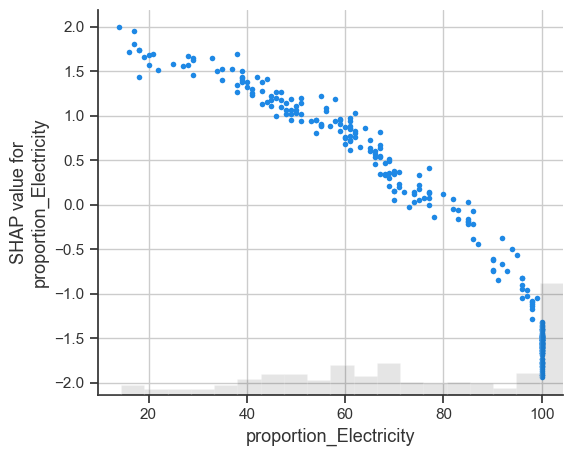

In [128]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

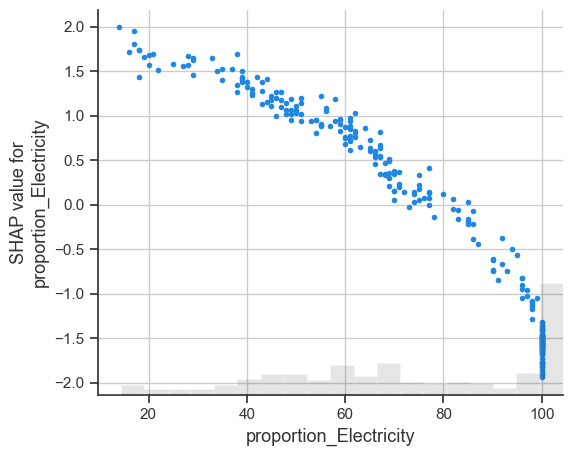

In [129]:
shap.plots.scatter(shap_values[:, shap_values.abs.max(0).argsort[-1]])

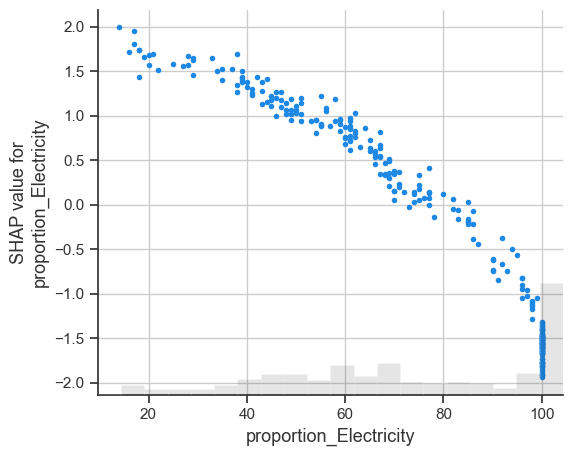

In [130]:
shap.plots.scatter(shap_values[:, shap_values.abs.percentile(95, 0).argsort[-1]])

### Exploring different interaction colorings

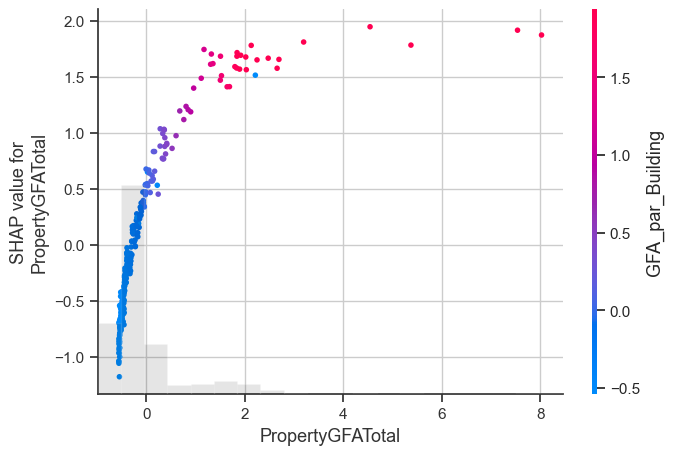

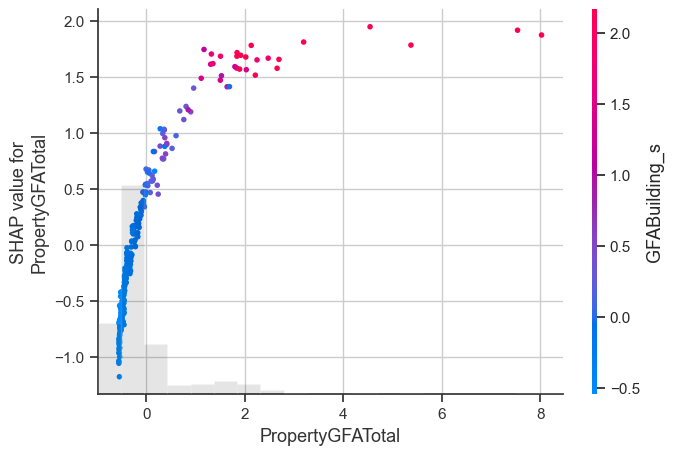

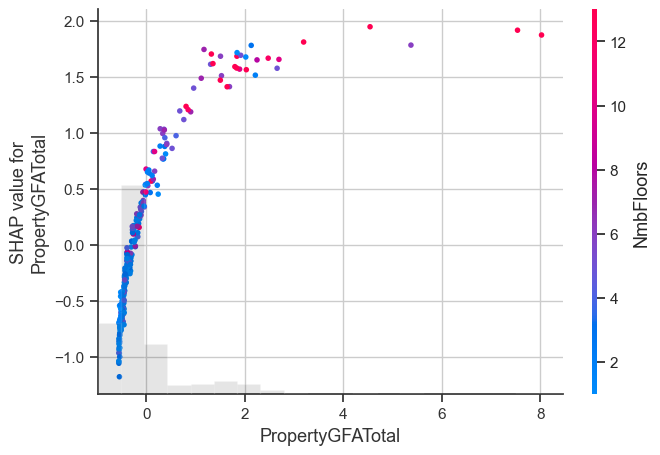

In [131]:
inds = shap.utils.potential_interactions(shap_values[:, "PropertyGFATotal"], shap_values)
for i in range(3):
    shap.plots.scatter(shap_values[:,"PropertyGFATotal"], color=shap_values[:,inds[i]])